In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from functions.Pre_processing_models import *
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

from functions.Pre_processing_Casos_Graves import *

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import svm
from sklearn.svm import SVC

from sklearn.model_selection._search import GridSearchCV
from sklearn.model_selection._split import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, SelectFdr

from sklearn.metrics import f1_score, precision_score, recall_score

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn import metrics

C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Lendo o dataset

In [2]:
df = pd.read_csv(r'C:\Users\gabri\Desktop\Git - Tcc\Estudo_dados_de_covid\Data\Casos Graves\df_casos_graves')

Utilizando a class random forest para fazer o pré processamento

In [3]:
list_features = ["SYMPTOM_COUGH",'SYMPTOM_COLD','SYMPTOM_AIR_INSUFFICIENCY','SYMPTOM_FEVER','SYMPTOM_LOW_OXYGEN_SATURATION','SYMPTOM_BREATHING_CONDITION','SYMPTOM_TORACIC_APERTURE','SYMPTOM_THROAT_CONDITION',
                'SYMPTOM_HEADACHE','SYMPTOM_BODY_PAIN','SYMPTOM_DIARRHEA','SYMPTOM_RUNNY_NOSE','SYMPTOM_NOSE_CONGESTION','SYMPTOM_WEAKNESS','SYMPTOM_ANOSMIA_OR_HYPOSMIA','SYMPTOM_NAUSEA','SYMPTOM_LACK_OF_APPETITE',
                'SYMPTOM_ABDOMINAL_PAIN','SYMPTOM_CONSCIOUSNESS_DEGRADATION','DISEASE_HEART_OR_VASCULAR','DISEASE_DIABETES','DISEASE_HYPERTENSION','DISEASE_RESPIRATORY','DISEASE_OBESITY','DISEASE_KIDNEY','DISEASE_IMMUNOSUPPRESSION',
                'DISEASE_TABAGIST','DISEASE_ETILISM','DISEASE_LIVER','DISEASE_NEUROLOGIC','death', 'idade', 'sexo_Feminino','sexo_Masculino', 'data_notificacao']

In [4]:
Pre_processing_models_df = Pre_processing_models(df)
Pre_processing_models_df.run_graves()

df = Pre_processing_models_df.df
df = df[list_features]
df['data_notificacao'] = pd.to_datetime(df['data_notificacao'])
df

C:\Users\gabri\AppData\Local\Temp\ipykernel_16060\977370476.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['data_notificacao'] = pd.to_datetime(df['data_notificacao'])


,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino,data_notificacao
0,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0.460870,0,1,2020-05-30
1,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000000,1,0,2020-06-02
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.747826,1,0,2020-06-02
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.573913,0,1,2020-06-01
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.591304,0,1,2020-06-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36430,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.669565,0,1,2022-06-08
36431,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.643478,0,1,2022-06-09
36432,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.643478,0,1,2022-06-10
36433,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.634783,1,0,2022-06-12


In [5]:
# df2 = pd.DataFrame()
# df2 = df
# df2.set_index('data_notificacao', inplace=True)
# df2.sort_index(inplace=True)
# df2

### Criação de uma função para instância do modelo:

In [5]:
def SVC_model (X_train, y_train):
    param_grid = {'C': [0.1, 1, 10, 100], 
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf', 'linear', 'sigmoid']}
    

    # Init classifier
    svc_cl = SVC()

    # prepare the cross-validation procedure
    cv = RepeatedKFold(n_splits = 5, n_repeats = 10, random_state = 1)

    # Init Grid Search
    grid_cv = GridSearchCV(svc_cl, param_grid, n_jobs = -1, cv=5, scoring = "roc_auc")

    # Fit 
    grid_cv.fit(X_train, y_train)

    mean_test_score = grid_cv.cv_results_['mean_test_score'].mean()
    std_test_score = grid_cv.cv_results_['std_test_score'].mean()
    best_score = grid_cv.best_score_
    best_params = grid_cv.best_params_

    #print(f"mean_test_score: {grid_cv.cv_results_['mean_test_score']}")
    #print(f"std_test_score: {grid_cv.cv_results_['std_test_score']}")
    #print('')

    print('#'*40)
    #print(f"mean_test_score: {grid_cv.cv_results_['mean_test_score'].mean()}")
    #print(f"std_test_score: {grid_cv.cv_results_['std_test_score'].mean()}")
    print('')
    print(f'best_score: {grid_cv.best_score_}')
    print(f'best_params_: {grid_cv.best_params_}')
    print('#'*40)
    print('')

    return mean_test_score, std_test_score, best_score, best_params

In [10]:
def apply_model_svc(df):
    list_random_states = [42]

    mean_test_scores = []
    std_test_scores = []
    best_scores = []
    best_params = []

    #treino!
    data_inicio = df['data_notificacao'][0]
    data_fim = df['data_notificacao'][0]+pd.Timedelta(days=90)
    
    treino = df[(df['data_notificacao'] >= data_inicio) & (df['data_notificacao'] <= data_fim )]
    X_train = treino.drop(labels=['death', 'data_notificacao'], axis=1)
    y_train = treino['death']

    #teste!
    teste = df[(df['data_notificacao'] > data_fim)]
    X_test = teste.drop(labels=['death', 'data_notificacao'], axis=1)
    y_test = teste['death']


    for random_state in list_random_states:

        mean_test_score, std_test_score, best_score, best_param = SVC_model(X_train,y_train)

        mean_test_scores.append(mean_test_score)
        std_test_scores.append(std_test_score)
        best_scores.append(best_score)
        best_params.append(best_param)

    return (X_train,y_train,X_test,y_test, mean_test_scores,std_test_scores,best_scores,best_params)

In [13]:
def final_cl(X_train, y_train, X_test ,y_test, C , gamma, kernel):

    # parametrizando o modelo final
    final_cl = SVC(C=C, gamma=gamma, kernel=kernel)
    #treinando o modelo final
    final_cl.fit(X_train, y_train)
    preds = final_cl.predict(X_test)
    accuracy_score(y_test, preds)

    print('accuracy_score:', accuracy_score)

    print('Métricas F1')
    print('F1:',f1_score(y_test, preds))
    print('Macro',f1_score(y_test, preds, average='macro'))
    print('Micro',f1_score(y_test, preds, average='micro'))
    print('weighted',f1_score(y_test, preds, average='weighted'))

    print('Métricas precision_score')
    print(precision_score(y_test, preds))
    print(precision_score(y_test, preds, average='macro'))
    print(precision_score(y_test, preds, average='micro'))
    print(precision_score(y_test, preds, average='weighted'))

    return preds, final_cl

In [15]:
def conf_matrix (X_test, y_test, preds, final_cl):

    confusion_matrix(y_test, preds)
    matrix = plot_confusion_matrix(final_cl, X_test, y_test, cmap=plt.cm.Blues)
    plt.show()
    print(classification_report(y_test, preds))


def roc_curve(y_test, preds):

    roc_auc_score(y_test, preds, multi_class='ovr')

    fpr, tpr, _ = metrics.roc_curve(y_test,  preds)
    auc = metrics.roc_auc_score(y_test, preds)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    plt.show()

TESTEEEEEE

In [11]:
#Periodo 1
data_inicio = df['data_notificacao'][0]
data_fim = df['data_notificacao'][0]+pd.Timedelta(days=180)

df_1 = df[(df['data_notificacao'] >= data_inicio) & (df['data_notificacao'] < data_fim )]

In [14]:
X_train,y_train,X_test,y_test, mean_test_scores,std_test_scores,best_scores,best_params = apply_model_svc(df_1)

########################################

best_score: 0.7690702358465754
best_params_: {'C': 100, 'gamma': 1, 'kernel': 'linear'}
########################################



In [16]:
preds, final_cl = final_cl(X_train, y_train, X_test ,y_test, 100 , 1, 'linear')

accuracy_score: <function accuracy_score at 0x000002122537D430>
Métricas F1
F1: 0.003472222222222222
Macro 0.4262097953216374
Micro 0.7376599634369287
weighted 0.626758973053444
Métricas precision_score
1.0
0.8687700045724738
0.7376599634369287
0.8065137270341866


C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


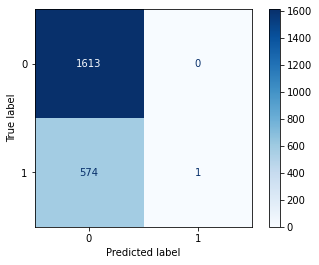

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1613
           1       1.00      0.00      0.00       575

    accuracy                           0.74      2188
   macro avg       0.87      0.50      0.43      2188
weighted avg       0.81      0.74      0.63      2188



In [17]:
conf_matrix (X_test, y_test, preds, final_cl)

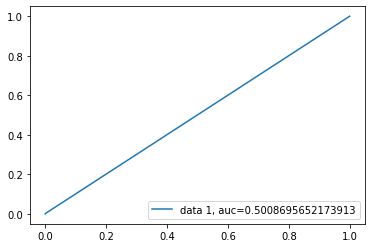

In [18]:
roc_curve(y_test, preds)

Aplicando o modelo para diferentes random_states 

In [7]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits = 2)

#utilizando diferentes random_states para mudar os conjuntos de treino e teste
#list_random_states = [0,12,42,50,54,68,79,81,92,112]
list_random_states = [12, 42]

#listas para armazenar os resutados
mean_test_scores = []
std_test_scores = []
best_scores = []
best_params = []

X = df2.drop(labels=['death'], axis=1)
y = df2['death']


for random_state in list_random_states:
    
    for train_index, test_index in tss.split(X):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    mean_test_score, std_test_score, best_score, best_param = SVC_model(X_train,y_train)

    mean_test_scores.append(mean_test_score)
    std_test_scores.append(std_test_score)
    best_scores.append(best_score)
    best_params.append(best_param)


########################################

best_score: 0.8089379230362226
best_params_: {'C': 100, 'gamma': 1, 'kernel': 'linear'}
########################################

########################################

best_score: 0.8089379230362226
best_params_: {'C': 100, 'gamma': 1, 'kernel': 'linear'}
########################################



In [8]:
X_train.index

Index(['2020-02-26', '2020-02-26', '2020-02-27', '2020-02-27', '2020-02-27',
       '2020-02-27', '2020-02-29', '2020-03-01', '2020-03-02', '2020-03-04',
       ...
       '2021-04-13', '2021-04-13', '2021-04-13', '2021-04-13', '2021-04-13',
       '2021-04-13', '2021-04-13', '2021-04-13', '2021-04-13', '2021-04-13'],
      dtype='object', name='data_notificacao', length=24290)

In [9]:
X_test.index

Index(['2021-04-13', '2021-04-13', '2021-04-13', '2021-04-13', '2021-04-13',
       '2021-04-13', '2021-04-13', '2021-04-13', '2021-04-13', '2021-04-13',
       ...
       '2022-06-12', '2022-06-12', '2022-06-12', '2022-06-12', '2022-06-12',
       '2022-06-12', '2022-06-12', '2022-06-12', '2022-06-13', '2022-06-13'],
      dtype='object', name='data_notificacao', length=12145)

## Testando o modelo para os melhores parâmetros:

In [10]:
print(f'Best_score = {max(best_scores)}')
index = best_scores.index(max(best_scores))
print(f'Best_params = {best_params[index]}')

Best_score = 0.8089379230362226
Best_params = {'C': 100, 'gamma': 1, 'kernel': 'linear'}


In [11]:
# parametrizando o modelo final
final_cl = SVC(C=100, gamma=1, kernel='linear')

#treinando o modelo final
final_cl.fit(X_train, y_train)


preds = final_cl.predict(X_test)

accuracy_score(y_test, preds)

0.7217785096747633

In [12]:
from sklearn.metrics import f1_score
print(f1_score(y_test, preds))
print(f1_score(y_test, preds, average='macro'))
print(f1_score(y_test, preds, average='micro'))
print(f1_score(y_test, preds, average='weighted'))

0.10773699498283601
0.47146592225852535
0.7217785096747633
0.6311832025517531


In [13]:
from sklearn.metrics import precision_score
print(precision_score(y_test, preds))
print(precision_score(y_test, preds, average='macro'))
print(precision_score(y_test, preds, average='micro'))
print(precision_score(y_test, preds, average='weighted'))

0.5354330708661418
0.6316233698431355
0.7217785096747633
0.6738615637043383


In [14]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, preds, multi_class='ovr')

0.5198201352634101

#### Matriz de Confusão e Classification Report:

c:\Users\mcacs\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


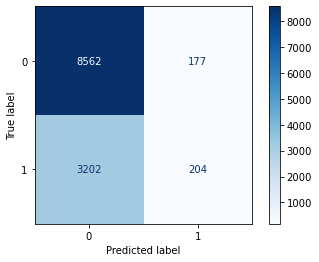

              precision    recall  f1-score   support

           0       0.73      0.98      0.84      8739
           1       0.54      0.06      0.11      3406

    accuracy                           0.72     12145
   macro avg       0.63      0.52      0.47     12145
weighted avg       0.67      0.72      0.63     12145



In [15]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix(y_test, preds)
matrix = plot_confusion_matrix(final_cl, X_test, y_test, cmap=plt.cm.Blues)
plt.show()
print(classification_report(y_test, preds))

#### Curva ROC:

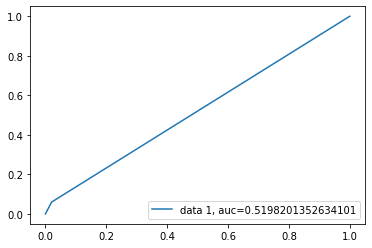

In [16]:
from sklearn import metrics
#y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  preds)
auc = metrics.roc_auc_score(y_test, preds)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Aplicando para os períodos de 6 meses:

In [6]:
df = pd.read_csv(r'C:\Users\mcacs\Desktop\Estudo_dados_de_covid\Data\Casos Graves\df_casos_graves')

In [7]:
periodo_1 = df[(df['data_notificacao'] > '2020-02-26') & (df['data_notificacao'] < '2020-08-31')]
periodo_2 = df[(df['data_notificacao'] > '2020-09-01') & (df['data_notificacao'] < '2021-02-28')]
periodo_3 = df[(df['data_notificacao'] > '2021-03-01') & (df['data_notificacao'] < '2021-08-31')]
periodo_4 = df[(df['data_notificacao'] > '2021-09-01') & (df['data_notificacao'] < '2022-02-28')]
periodo_5 = df[(df['data_notificacao'] > '2022-03-01') & (df['data_notificacao'] < '2022-06-13')]

#### Criando listas para armazenamento dos melhores parâmetros:

In [8]:
mean_test_scores_periodos_6meses = []
std_test_scores_periodos_6meses = []
best_scores_periodos_6meses = []
best_params_periodos_6meses = []

#### Período 1 (26/02/2020 até 31/08/2020):

In [9]:
Pre_processing_models_1 = Pre_processing_models(periodo_1)
Pre_processing_models_1.run_graves()

df_p1 = Pre_processing_models_1.df
df_p1 = df_p1[list_features]
df_p1

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino,data_notificacao
0,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0.486239,0,1,2020-05-30
1,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000000,1,0,2020-06-02
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.788991,1,0,2020-06-02
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.605505,0,1,2020-06-01
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.623853,0,1,2020-06-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36273,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0.211009,1,0,2020-05-31
36274,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.614679,0,1,2020-05-13
36275,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.623853,0,1,2020-05-12
36276,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.752294,1,0,2020-07-31


In [10]:
df2_p1 = pd.DataFrame()
df2_p1 = df_p1
df2_p1.set_index('data_notificacao', inplace=True)
df2_p1.sort_index(inplace=True)
df2_p1

c:\Users\mcacs\anaconda3\lib\site-packages\pandas\core\frame.py:6393: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().sort_index(


,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_KIDNEY,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino
data_notificacao,,,,,,,,,,,,,,,,,,,,,
2020-02-27,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0.330275,0,1
2020-02-27,1,0,1,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0.293578,0,1
2020-02-27,1,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0.229358,1,0
2020-02-27,1,0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0.275229,1,0
2020-02-29,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.238532,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-30,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.504587,1,0
2020-08-30,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.467890,0,1
2020-08-30,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.788991,0,1


#### Aplicação do modelo:

In [14]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits = 2)

#utilizando diferentes random_states para mudar os conjuntos de treino e teste
#list_random_states = [0,12,42,50,54,68,79,81,92,112]
list_random_states = [42]

#listas para armazenar os resutados
mean_test_scores_1 = []
std_test_scores_1 = []
best_scores_1 = []
best_params_1 = []

X = df2_p1.drop(labels=['death'], axis=1)
y = df2_p1['death']

for random_state in list_random_states:

    for train_index, test_index in tss.split(X):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    mean_test_score, std_test_score, best_score, best_param = SVC_model(X_train,y_train)

    mean_test_scores_1.append(mean_test_score)
    std_test_scores_1.append(std_test_score)
    best_scores_1.append(best_score)
    best_params_1.append(best_param)


#armazenando as informações na lista para todos os periodos de 6 meses
mean_test_scores_periodos_6meses.append(mean_test_scores_1)
std_test_scores_periodos_6meses.append(std_test_scores_1)
best_scores_periodos_6meses.append(best_scores_1)
best_params_periodos_6meses.append(best_params_1)


########################################

best_score: 0.8861477451198987
best_params_: {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
########################################



In [15]:
X_train.index

Index(['2020-02-27', '2020-02-27', '2020-02-27', '2020-02-27', '2020-02-29',
       '2020-03-01', '2020-03-02', '2020-03-04', '2020-03-04', '2020-03-04',
       ...
       '2020-05-26', '2020-05-26', '2020-05-26', '2020-05-26', '2020-05-26',
       '2020-05-26', '2020-05-26', '2020-05-26', '2020-05-26', '2020-05-26'],
      dtype='object', name='data_notificacao', length=10914)

In [16]:
X_test.index

Index(['2020-05-26', '2020-05-26', '2020-05-26', '2020-05-26', '2020-05-26',
       '2020-05-26', '2020-05-26', '2020-05-26', '2020-05-26', '2020-05-26',
       ...
       '2020-08-30', '2020-08-30', '2020-08-30', '2020-08-30', '2020-08-30',
       '2020-08-30', '2020-08-30', '2020-08-30', '2020-08-30', '2020-08-30'],
      dtype='object', name='data_notificacao', length=5457)

In [17]:
print(f'Best_score = {max(best_scores_periodos_6meses[0])}')
index = best_scores_periodos_6meses[0].index(max(best_scores_periodos_6meses[0]))
print(f'Best_params = {best_params_periodos_6meses[0][index]}')

Best_score = 0.8861477451198987
Best_params = {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}


## Testando o modelo para os melhores parâmetros:

In [18]:
# parametrizando o modelo final
final_cl_p1 = SVC(C=0.1, gamma=0.01, kernel='rbf')

#treinando o modelo final
final_cl_p1.fit(X_train, y_train)


preds = final_cl_p1.predict(X_test)

accuracy_score(y_test, preds)

0.7786329485065054

In [19]:
from sklearn.metrics import f1_score
print(f1_score(y_test, preds))
print(f1_score(y_test, preds, average='macro'))
print(f1_score(y_test, preds, average='micro'))
print(f1_score(y_test, preds, average='weighted'))

0.0033003300330033004
0.4393949599041537
0.7786329485065054
0.6820959661197821


In [20]:
from sklearn.metrics import precision_score
print(precision_score(y_test, preds))
print(precision_score(y_test, preds, average='macro'))
print(precision_score(y_test, preds, average='micro'))
print(precision_score(y_test, preds, average='weighted'))

1.0
0.8892758936755271
0.7786329485065054
0.827654286399107


In [21]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, preds, multi_class='ovr')

0.5008264462809917

#### Matriz de Confusão e Classification Report:

c:\Users\mcacs\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


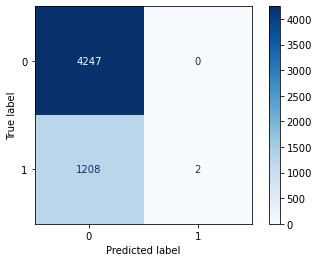

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4247
           1       1.00      0.00      0.00      1210

    accuracy                           0.78      5457
   macro avg       0.89      0.50      0.44      5457
weighted avg       0.83      0.78      0.68      5457



In [22]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix(y_test, preds)
matrix = plot_confusion_matrix(final_cl_p1, X_test, y_test, cmap=plt.cm.Blues)
plt.show()
print(classification_report(y_test, preds))

#### Curva ROC:

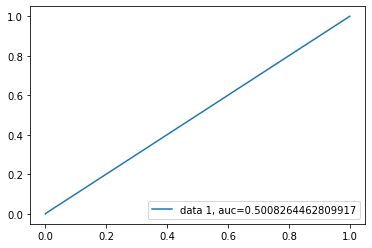

In [23]:
from sklearn import metrics
#y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  preds)
auc = metrics.roc_auc_score(y_test, preds)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### Período 2 (01/09/2020 até 28/02/2021):

In [24]:
Pre_processing_models_2 = Pre_processing_models(periodo_2)
Pre_processing_models_2.run_graves()

df_p2 = Pre_processing_models_2.df
df_p2 = df_p2[list_features]
df_p2

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino,data_notificacao
431,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0.736842,0,1,2020-09-16
432,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.166667,0,1,2020-09-27
433,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.798246,1,0,2020-09-30
434,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.500000,0,1,2020-09-30
436,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.736842,1,0,2020-11-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36245,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.666667,1,0,2021-01-18
36246,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.570175,1,0,2020-12-30
36247,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.429825,0,1,2021-02-02
36351,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0.798246,1,0,2021-01-13


In [25]:
df2_p2 = pd.DataFrame()
df2_p2 = df_p2
df2_p2.set_index('data_notificacao', inplace=True)
df2_p2.sort_index(inplace=True)
df2_p2

c:\Users\mcacs\anaconda3\lib\site-packages\pandas\core\frame.py:6393: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().sort_index(


,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_KIDNEY,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino
data_notificacao,,,,,,,,,,,,,,,,,,,,,
2020-09-02,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.201754,1,0
2020-09-02,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.500000,0,1
2020-09-02,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.026316,0,1
2020-09-02,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.508772,0,1
2020-09-02,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.552632,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-27,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0.789474,0,1
2021-02-27,1,0,1,1,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0.464912,1,0
2021-02-27,1,0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0.368421,1,0


#### Aplicação do modelo:

In [26]:
#utilizando diferentes random_states para mudar os conjuntos de treino e teste
#list_random_states = [0,12,42,50,54,68,79,81,92,112]
list_random_states = [42]

#listas para armazenar os resutados
mean_test_scores_2 = []
std_test_scores_2 = []
best_scores_2 = []
best_params_2 = []

X = df2_p2.drop(labels=['death'], axis=1)
y = df2_p2['death']

for random_state in list_random_states:

    for train_index, test_index in tss.split(X):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    mean_test_score, std_test_score, best_score, best_param = SVC_model(X_train,y_train)

    mean_test_scores_2.append(mean_test_score)
    std_test_scores_2.append(std_test_score)
    best_scores_2.append(best_score)
    best_params_2.append(best_param)


#armazenando as informações na lista para todos os periodos de 6 meses
mean_test_scores_periodos_6meses.append(mean_test_scores_2)
std_test_scores_periodos_6meses.append(std_test_scores_2)
best_scores_periodos_6meses.append(best_scores_2)
best_params_periodos_6meses.append(best_params_2)


########################################

best_score: 0.7654089888604513
best_params_: {'C': 100, 'gamma': 1, 'kernel': 'linear'}
########################################



In [27]:
X_train.index

Index(['2020-09-02', '2020-09-02', '2020-09-02', '2020-09-02', '2020-09-02',
       '2020-09-02', '2020-09-02', '2020-09-02', '2020-09-02', '2020-09-02',
       ...
       '2021-01-07', '2021-01-07', '2021-01-07', '2021-01-07', '2021-01-07',
       '2021-01-07', '2021-01-07', '2021-01-07', '2021-01-07', '2021-01-07'],
      dtype='object', name='data_notificacao', length=3383)

In [28]:
X_test.index

Index(['2021-01-07', '2021-01-07', '2021-01-07', '2021-01-07', '2021-01-07',
       '2021-01-07', '2021-01-07', '2021-01-07', '2021-01-07', '2021-01-07',
       ...
       '2021-02-27', '2021-02-27', '2021-02-27', '2021-02-27', '2021-02-27',
       '2021-02-27', '2021-02-27', '2021-02-27', '2021-02-27', '2021-02-27'],
      dtype='object', name='data_notificacao', length=1691)

In [29]:
print(f'Best_score = {max(best_scores_periodos_6meses[1])}')
index = best_scores_periodos_6meses[1].index(max(best_scores_periodos_6meses[1]))
print(f'Best_params = {best_params_periodos_6meses[1][index]}')

Best_score = 0.7654089888604513
Best_params = {'C': 100, 'gamma': 1, 'kernel': 'linear'}


## Testando o modelo para os melhores parâmetros:

In [30]:
# parametrizando o modelo final
final_cl_p2 = SVC(C=100, gamma=1, kernel='linear')

#treinando o modelo final
final_cl_p2.fit(X_train, y_train)


preds = final_cl_p2.predict(X_test)

accuracy_score(y_test, preds)

0.7149615612063868

In [31]:
from sklearn.metrics import f1_score
print(f1_score(y_test, preds))
print(f1_score(y_test, preds, average='macro'))
print(f1_score(y_test, preds, average='micro'))
print(f1_score(y_test, preds, average='weighted'))

0.4522727272727272
0.6298134219896809
0.7149615612063868
0.6838840652653942


In [32]:
from sklearn.metrics import precision_score
print(precision_score(y_test, preds))
print(precision_score(y_test, preds, average='macro'))
print(precision_score(y_test, preds, average='micro'))
print(precision_score(y_test, preds, average='weighted'))

0.6815068493150684
0.7017255476024948
0.7149615612063868
0.7078832233080091


In [33]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, preds, multi_class='ovr')

0.6270599354882479

#### Matriz de Confusão e Classification Report:

c:\Users\mcacs\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


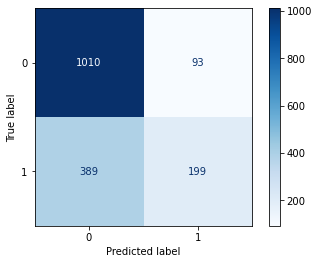

              precision    recall  f1-score   support

           0       0.72      0.92      0.81      1103
           1       0.68      0.34      0.45       588

    accuracy                           0.71      1691
   macro avg       0.70      0.63      0.63      1691
weighted avg       0.71      0.71      0.68      1691



In [34]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix(y_test, preds)
matrix = plot_confusion_matrix(final_cl_p2, X_test, y_test, cmap=plt.cm.Blues)
plt.show()
print(classification_report(y_test, preds))

#### Curva ROC:

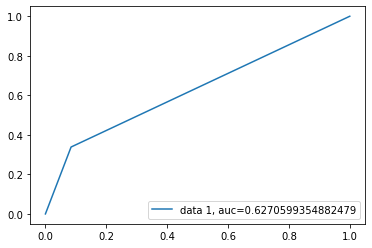

In [35]:
from sklearn import metrics
#y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  preds)
auc = metrics.roc_auc_score(y_test, preds)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### Período 3 (01/03/2021 até 31/08/2021):

In [36]:
Pre_processing_models_3 = Pre_processing_models(periodo_3)
Pre_processing_models_3.run_graves()

df_p3 = Pre_processing_models_3.df
df_p3 = df_p3[list_features]
df_p3

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino,data_notificacao
952,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.429825,0,1,2021-05-07
953,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.315789,1,0,2021-04-27
954,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.368421,1,0,2021-04-14
955,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0.394737,0,1,2021-04-10
956,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0.377193,0,1,2021-03-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36364,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.622807,1,0,2021-06-09
36366,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0.508772,1,0,2021-05-29
36371,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.403509,0,1,2021-07-01
36372,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.622807,0,1,2021-06-18


In [37]:
df2_p3 = pd.DataFrame()
df2_p3 = df_p3
df2_p3.set_index('data_notificacao', inplace=True)
df2_p3.sort_index(inplace=True)
df2_p3

c:\Users\mcacs\anaconda3\lib\site-packages\pandas\core\frame.py:6393: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().sort_index(


,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_KIDNEY,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino
data_notificacao,,,,,,,,,,,,,,,,,,,,,
2021-03-02,0,0,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0.552632,1,0
2021-03-02,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.421053,1,0
2021-03-02,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.684211,0,1
2021-03-02,1,0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0.622807,1,0
2021-03-02,1,0,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0.543860,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-30,1,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0.324561,1,0
2021-08-30,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.508772,1,0
2021-08-30,1,0,1,1,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0.657895,0,1


#### Aplicação do modelo:

In [38]:
#utilizando diferentes random_states para mudar os conjuntos de treino e teste
#list_random_states = [0,12,42,50,54,68,79,81,92,112]
list_random_states = [42]

#listas para armazenar os resutados
mean_test_scores_3 = []
std_test_scores_3 = []
best_scores_3 = []
best_params_3 = []

X = df2_p3.drop(labels=['death'], axis=1)
y = df2_p3['death']

for random_state in list_random_states:

    for train_index, test_index in tss.split(X):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    mean_test_score, std_test_score, best_score, best_param = SVC_model(X_train,y_train)

    mean_test_scores_3.append(mean_test_score)
    std_test_scores_3.append(std_test_score)
    best_scores_3.append(best_score)
    best_params_3.append(best_param)


#armazenando as informações na lista para todos os periodos de 6 meses
mean_test_scores_periodos_6meses.append(mean_test_scores_3)
std_test_scores_periodos_6meses.append(std_test_scores_3)
best_scores_periodos_6meses.append(best_scores_3)
best_params_periodos_6meses.append(best_params_3)


########################################

best_score: 0.7819735316557496
best_params_: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
########################################



In [39]:
X_train.index

Index(['2021-03-02', '2021-03-02', '2021-03-02', '2021-03-02', '2021-03-02',
       '2021-03-02', '2021-03-02', '2021-03-02', '2021-03-02', '2021-03-02',
       ...
       '2021-06-02', '2021-06-02', '2021-06-02', '2021-06-02', '2021-06-02',
       '2021-06-02', '2021-06-02', '2021-06-02', '2021-06-02', '2021-06-02'],
      dtype='object', name='data_notificacao', length=5810)

In [40]:
X_test.index

Index(['2021-06-02', '2021-06-02', '2021-06-02', '2021-06-02', '2021-06-02',
       '2021-06-02', '2021-06-02', '2021-06-02', '2021-06-02', '2021-06-02',
       ...
       '2021-08-30', '2021-08-30', '2021-08-30', '2021-08-30', '2021-08-30',
       '2021-08-30', '2021-08-30', '2021-08-30', '2021-08-30', '2021-08-30'],
      dtype='object', name='data_notificacao', length=2904)

In [41]:
print(f'Best_score = {max(best_scores_periodos_6meses[2])}')
index = best_scores_periodos_6meses[2].index(max(best_scores_periodos_6meses[2]))
print(f'Best_params = {best_params_periodos_6meses[2][index]}')

Best_score = 0.7819735316557496
Best_params = {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


## Testando o modelo para os melhores parâmetros:

In [42]:
# parametrizando o modelo final
final_cl_p3 = SVC(C=100, gamma=0.01, kernel='rbf')

#treinando o modelo final
final_cl_p3.fit(X_train, y_train)


preds = final_cl_p3.predict(X_test)

accuracy_score(y_test, preds)

0.7579201101928374

In [43]:
from sklearn.metrics import f1_score
print(f1_score(y_test, preds))
print(f1_score(y_test, preds, average='macro'))
print(f1_score(y_test, preds, average='micro'))
print(f1_score(y_test, preds, average='weighted'))

0.49021029731689625
0.6657418612346504
0.7579201101928374
0.7357368856894573


In [44]:
from sklearn.metrics import precision_score
print(precision_score(y_test, preds))
print(precision_score(y_test, preds, average='macro'))
print(precision_score(y_test, preds, average='micro'))
print(precision_score(y_test, preds, average='weighted'))

0.6679841897233202
0.7224408021177068
0.7579201101928374
0.7441559388782782


In [45]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, preds, multi_class='ovr')

0.6522264014307444

#### Matriz de Confusão e Classification Report:

c:\Users\mcacs\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


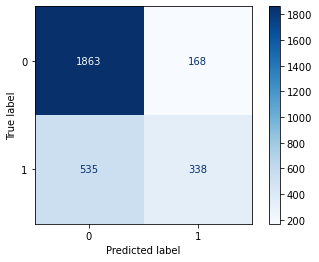

              precision    recall  f1-score   support

           0       0.78      0.92      0.84      2031
           1       0.67      0.39      0.49       873

    accuracy                           0.76      2904
   macro avg       0.72      0.65      0.67      2904
weighted avg       0.74      0.76      0.74      2904



In [46]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix(y_test, preds)
matrix = plot_confusion_matrix(final_cl_p3, X_test, y_test, cmap=plt.cm.Blues)
plt.show()
print(classification_report(y_test, preds))

#### Curva ROC:

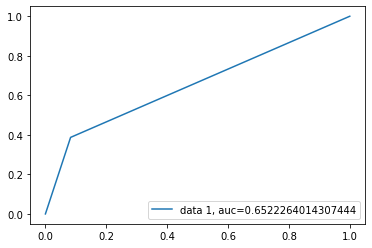

In [47]:
from sklearn import metrics
#y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  preds)
auc = metrics.roc_auc_score(y_test, preds)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### Período 4 (01/09/2021 até 28/02/2022):

In [48]:
Pre_processing_models_4 = Pre_processing_models(periodo_4)
Pre_processing_models_4.run_graves()

df_p4 = Pre_processing_models_4.df
df_p4 = df_p4[list_features]
df_p4

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino,data_notificacao
1804,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.252174,0,1,2021-09-18
1805,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.243478,1,0,2021-09-25
1807,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.721739,0,1,2021-09-08
1808,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.573913,1,0,2021-10-07
1809,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0.530435,0,1,2021-10-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36360,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.234783,0,1,2022-02-26
36361,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.582609,0,1,2021-12-30
36368,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.756522,0,1,2022-02-02
36385,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.800000,0,1,2021-11-22


In [49]:
df2_p4 = pd.DataFrame()
df2_p4 = df_p4
df2_p4.set_index('data_notificacao', inplace=True)
df2_p4.sort_index(inplace=True)
df2_p4

c:\Users\mcacs\anaconda3\lib\site-packages\pandas\core\frame.py:6393: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().sort_index(


,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_KIDNEY,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino
data_notificacao,,,,,,,,,,,,,,,,,,,,,
2021-09-02,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.617391,0,1
2021-09-02,1,0,1,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0.426087,0,1
2021-09-02,1,0,0,1,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0.382609,0,1
2021-09-02,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.765217,1,0
2021-09-02,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.095652,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-27,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0.591304,1,0
2022-02-27,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.460870,1,0
2022-02-27,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000000,0,1


#### Aplicação do modelo:

In [50]:
#utilizando diferentes random_states para mudar os conjuntos de treino e teste
#list_random_states = [0,12,42,50,54,68,79,81,92,112]
list_random_states = [42]

#listas para armazenar os resutados
mean_test_scores_4 = []
std_test_scores_4 = []
best_scores_4 = []
best_params_4 = []

X = df2_p4.drop(labels=['death'], axis=1)
y = df2_p4['death']

for random_state in list_random_states:

    for train_index, test_index in tss.split(X):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    mean_test_score, std_test_score, best_score, best_param = SVC_model(X_train,y_train)

    mean_test_scores_4.append(mean_test_score)
    std_test_scores_4.append(std_test_score)
    best_scores_4.append(best_score)
    best_params_4.append(best_param)


#armazenando as informações na lista para todos os periodos de 6 meses
mean_test_scores_periodos_6meses.append(mean_test_scores_4)
std_test_scores_periodos_6meses.append(std_test_scores_4)
best_scores_periodos_6meses.append(best_scores_4)
best_params_periodos_6meses.append(best_params_4)


########################################

best_score: 0.6521231667373599
best_params_: {'C': 100, 'gamma': 1, 'kernel': 'linear'}
########################################



In [51]:
X_train.index

Index(['2021-09-02', '2021-09-02', '2021-09-02', '2021-09-02', '2021-09-02',
       '2021-09-02', '2021-09-02', '2021-09-02', '2021-09-02', '2021-09-02',
       ...
       '2022-01-11', '2022-01-11', '2022-01-11', '2022-01-11', '2022-01-11',
       '2022-01-11', '2022-01-11', '2022-01-11', '2022-01-11', '2022-01-11'],
      dtype='object', name='data_notificacao', length=2924)

In [52]:
X_test.index

Index(['2022-01-11', '2022-01-11', '2022-01-11', '2022-01-11', '2022-01-11',
       '2022-01-11', '2022-01-11', '2022-01-11', '2022-01-11', '2022-01-11',
       ...
       '2022-02-27', '2022-02-27', '2022-02-27', '2022-02-27', '2022-02-27',
       '2022-02-27', '2022-02-27', '2022-02-27', '2022-02-27', '2022-02-27'],
      dtype='object', name='data_notificacao', length=1462)

In [53]:
print(f'Best_score = {max(best_scores_periodos_6meses[3])}')
index = best_scores_periodos_6meses[3].index(max(best_scores_periodos_6meses[3]))
print(f'Best_params = {best_params_periodos_6meses[3][index]}')

Best_score = 0.6521231667373599
Best_params = {'C': 100, 'gamma': 1, 'kernel': 'linear'}


## Testando o modelo para os melhores parâmetros:

In [54]:
# parametrizando o modelo final
final_cl_p4 = SVC(C=100, gamma=1, kernel='linear')

#treinando o modelo final
final_cl_p4.fit(X_train, y_train)


preds = final_cl_p4.predict(X_test)

accuracy_score(y_test, preds)

0.7373461012311902

In [55]:
from sklearn.metrics import f1_score
print(f1_score(y_test, preds))
print(f1_score(y_test, preds, average='macro'))
print(f1_score(y_test, preds, average='micro'))
print(f1_score(y_test, preds, average='weighted'))

0.04
0.4439302694136292
0.7373461012311902
0.6345676742668468


In [56]:
from sklearn.metrics import precision_score
print(precision_score(y_test, preds))
print(precision_score(y_test, preds, average='macro'))
print(precision_score(y_test, preds, average='micro'))
print(precision_score(y_test, preds, average='weighted'))

0.5714285714285714
0.6551894238358327
0.7373461012311902
0.6947208794863186


In [57]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, preds, multi_class='ovr')

0.5075745902112989

#### Matriz de Confusão e Classification Report:

c:\Users\mcacs\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


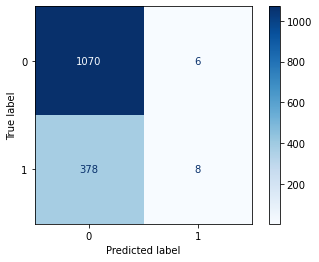

              precision    recall  f1-score   support

           0       0.74      0.99      0.85      1076
           1       0.57      0.02      0.04       386

    accuracy                           0.74      1462
   macro avg       0.66      0.51      0.44      1462
weighted avg       0.69      0.74      0.63      1462



In [58]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix(y_test, preds)
matrix = plot_confusion_matrix(final_cl_p4, X_test, y_test, cmap=plt.cm.Blues)
plt.show()
print(classification_report(y_test, preds))

#### Curva ROC:

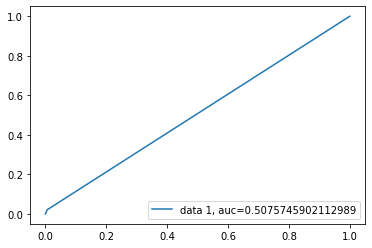

In [59]:
from sklearn import metrics
#y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  preds)
auc = metrics.roc_auc_score(y_test, preds)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### Período 5 (01/03/2022 até 13/06/2022):

In [60]:
Pre_processing_models_5 = Pre_processing_models(periodo_5)
Pre_processing_models_5.run_graves()

df_p5 = Pre_processing_models_5.df
df_p5 = df_p5[list_features]
df_p5

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino,data_notificacao
2165,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0.281818,0,1,2022-03-02
2169,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.600000,1,0,2022-03-07
2172,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0.554545,0,1,2022-03-12
2182,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.554545,0,1,2022-03-14
2185,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000000,0,1,2022-03-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36430,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.700000,0,1,2022-06-08
36431,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.672727,0,1,2022-06-09
36432,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.672727,0,1,2022-06-10
36433,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.663636,1,0,2022-06-12


In [61]:
df2_p5 = pd.DataFrame()
df2_p5 = df_p5
df2_p5.set_index('data_notificacao', inplace=True)
df2_p5.sort_index(inplace=True)
df2_p5

c:\Users\mcacs\anaconda3\lib\site-packages\pandas\core\frame.py:6393: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().sort_index(


,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_KIDNEY,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino
data_notificacao,,,,,,,,,,,,,,,,,,,,,
2022-03-02,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0.281818,0,1
2022-03-02,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.636364,1,0
2022-03-02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.681818,0,1
2022-03-02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.836364,0,1
2022-03-02,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0.427273,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-12,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000000,1,0
2022-06-12,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000000,0,1
2022-06-12,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.581818,0,1


#### Aplicação do modelo:

In [62]:
#utilizando diferentes random_states para mudar os conjuntos de treino e teste
#list_random_states = [0,12,42,50,54,68,79,81,92,112]
list_random_states = [42]

#listas para armazenar os resutados
mean_test_scores_5 = []
std_test_scores_5 = []
best_scores_5 = []
best_params_5 = []

X = df2_p5.drop(labels=['death'], axis=1)
y = df2_p5['death']

for random_state in list_random_states:

    for train_index, test_index in tss.split(X):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    mean_test_score, std_test_score, best_score, best_param = SVC_model(X_train,y_train)

    mean_test_scores_5.append(mean_test_score)
    std_test_scores_5.append(std_test_score)
    best_scores_5.append(best_score)
    best_params_5.append(best_param)


#armazenando as informações na lista para todos os periodos de 6 meses
mean_test_scores_periodos_6meses.append(mean_test_scores_5)
std_test_scores_periodos_6meses.append(std_test_scores_5)
best_scores_periodos_6meses.append(best_scores_5)
best_params_periodos_6meses.append(best_params_5)


########################################

best_score: 0.7630202576216794
best_params_: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
########################################



In [63]:
X_train.index

Index(['2022-03-02', '2022-03-02', '2022-03-02', '2022-03-02', '2022-03-02',
       '2022-03-02', '2022-03-02', '2022-03-02', '2022-03-02', '2022-03-02',
       ...
       '2022-05-05', '2022-05-05', '2022-05-05', '2022-05-05', '2022-05-06',
       '2022-05-06', '2022-05-06', '2022-05-06', '2022-05-06', '2022-05-06'],
      dtype='object', name='data_notificacao', length=1109)

In [64]:
X_test.index

Index(['2022-05-06', '2022-05-06', '2022-05-07', '2022-05-07', '2022-05-07',
       '2022-05-07', '2022-05-07', '2022-05-08', '2022-05-08', '2022-05-08',
       ...
       '2022-06-11', '2022-06-11', '2022-06-12', '2022-06-12', '2022-06-12',
       '2022-06-12', '2022-06-12', '2022-06-12', '2022-06-12', '2022-06-12'],
      dtype='object', name='data_notificacao', length=554)

In [65]:
print(f'Best_score = {max(best_scores_periodos_6meses[4])}')
index = best_scores_periodos_6meses[4].index(max(best_scores_periodos_6meses[4]))
print(f'Best_params = {best_params_periodos_6meses[4][index]}')

Best_score = 0.7630202576216794
Best_params = {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


## Testando o modelo para os melhores parâmetros:

In [66]:
# parametrizando o modelo final
final_cl_p5 = SVC(C=10, gamma=0.01, kernel='rbf')

#treinando o modelo final
final_cl_p5.fit(X_train, y_train)


preds = final_cl_p5.predict(X_test)

accuracy_score(y_test, preds)

0.8393501805054152

In [67]:
from sklearn.metrics import f1_score
print(f1_score(y_test, preds))
print(f1_score(y_test, preds, average='macro'))
print(f1_score(y_test, preds, average='micro'))
print(f1_score(y_test, preds, average='weighted'))

0.38620689655172413
0.6468936871128299
0.8393501805054152
0.8595839927691833


In [68]:
from sklearn.metrics import precision_score
print(precision_score(y_test, preds))
print(precision_score(y_test, preds, average='macro'))
print(precision_score(y_test, preds, average='micro'))
print(precision_score(y_test, preds, average='weighted'))

0.2978723404255319
0.6239361702127659
0.8393501805054152
0.8899665872954912


In [69]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, preds, multi_class='ovr')

0.7089034420925427

#### Matriz de Confusão e Classification Report:

c:\Users\mcacs\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


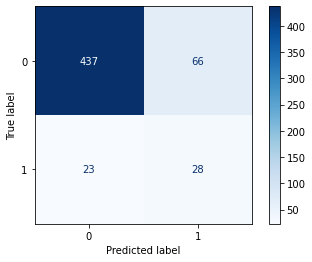

              precision    recall  f1-score   support

           0       0.95      0.87      0.91       503
           1       0.30      0.55      0.39        51

    accuracy                           0.84       554
   macro avg       0.62      0.71      0.65       554
weighted avg       0.89      0.84      0.86       554



In [70]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix(y_test, preds)
matrix = plot_confusion_matrix(final_cl_p5, X_test, y_test, cmap=plt.cm.Blues)
plt.show()
print(classification_report(y_test, preds))

#### Curva ROC:

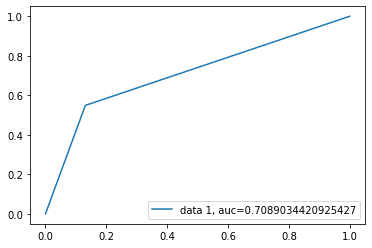

In [71]:
from sklearn import metrics
#y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  preds)
auc = metrics.roc_auc_score(y_test, preds)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Aplicando para os períodos de 3 meses:

In [72]:
df = pd.read_csv(r'C:\Users\mcacs\Desktop\Estudo_dados_de_covid\Data\Casos Graves\df_casos_graves')

In [73]:
periodo_1 = df[(df['data_notificacao'] > '2020-02-26') & (df['data_notificacao'] < '2020-05-31')]
periodo_2 = df[(df['data_notificacao'] > '2020-06-01') & (df['data_notificacao'] < '2020-08-31')]
periodo_3 = df[(df['data_notificacao'] > '2020-09-01') & (df['data_notificacao'] < '2020-11-30')]
periodo_4 = df[(df['data_notificacao'] > '2020-12-01') & (df['data_notificacao'] < '2021-02-28')]
periodo_5 = df[(df['data_notificacao'] > '2021-03-01') & (df['data_notificacao'] < '2021-05-31')]
periodo_6 = df[(df['data_notificacao'] > '2021-06-01') & (df['data_notificacao'] < '2021-08-31')]
periodo_7 = df[(df['data_notificacao'] > '2021-09-01') & (df['data_notificacao'] < '2021-11-30')]
periodo_8 = df[(df['data_notificacao'] > '2021-12-01') & (df['data_notificacao'] < '2022-02-28')]
periodo_9 = df[(df['data_notificacao'] > '2022-03-01') & (df['data_notificacao'] < '2025-05-31')]
periodo_10 = df[(df['data_notificacao'] > '2022-06-01') & (df['data_notificacao'] < '2022-06-13')]

In [74]:
mean_test_scores_periodos_3meses = []
std_test_scores_periodos_3meses = []
best_scores_periodos_3meses = []
best_params_periodos_3meses = []

#### Período 1 (26/02/2020 até 31/05/2020):

In [75]:
Pre_processing_models_13m = Pre_processing_models(periodo_1)
Pre_processing_models_13m.run_graves()

df_p13m = Pre_processing_models_13m.df
df_p13m = df_p13m[list_features]
df_p13m

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino,data_notificacao
0,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0.486239,0,1,2020-05-30
24,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.633028,0,1,2020-05-17
25,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.642202,0,1,2020-05-17
26,1,0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0.596330,0,1,2020-05-17
27,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.467890,0,1,2020-05-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36271,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.532110,1,0,2020-05-21
36272,1,0,1,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0.871560,1,0,2020-05-28
36274,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.614679,0,1,2020-05-13
36275,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.623853,0,1,2020-05-12


In [76]:
df2_p13m = pd.DataFrame()
df2_p13m = df_p13m
df2_p13m.set_index('data_notificacao', inplace=True)
df2_p13m.sort_index(inplace=True)
df2_p13m

c:\Users\mcacs\anaconda3\lib\site-packages\pandas\core\frame.py:6393: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().sort_index(


,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_KIDNEY,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino
data_notificacao,,,,,,,,,,,,,,,,,,,,,
2020-02-27,1,0,1,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0.293578,0,1
2020-02-27,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0.330275,0,1
2020-02-27,1,0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0.275229,1,0
2020-02-27,1,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0.229358,1,0
2020-02-29,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.238532,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-30,1,0,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0.330275,1,0
2020-05-30,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.330275,0,1
2020-05-30,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.605505,1,0


#### Aplicação do modelo:

In [77]:
#utilizando diferentes random_states para mudar os conjuntos de treino e teste
list_random_states = [42]

#listas para armazenar os resutados
mean_test_scores_1 = []
std_test_scores_1 = []
best_scores_1 = []
best_params_1 = []

X = df2_p13m.drop(labels=['death'], axis=1)
y = df2_p13m['death']

for random_state in list_random_states:

    for train_index, test_index in tss.split(X):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    mean_test_score, std_test_score, best_score, best_param = SVC_model(X_train,y_train)

    mean_test_scores_1.append(mean_test_score)
    std_test_scores_1.append(std_test_score)
    best_scores_1.append(best_score)
    best_params_1.append(best_param)


#armazenando as informações na lista para todos os periodos de 3 meses
mean_test_scores_periodos_3meses.append(mean_test_scores_1)
std_test_scores_periodos_3meses.append(std_test_scores_1)
best_scores_periodos_3meses.append(best_scores_1)
best_params_periodos_3meses.append(best_params_1)


########################################

best_score: 0.9045913754607439
best_params_: {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
########################################



In [78]:
X_train.index

Index(['2020-02-27', '2020-02-27', '2020-02-27', '2020-02-27', '2020-02-29',
       '2020-03-01', '2020-03-02', '2020-03-04', '2020-03-04', '2020-03-04',
       ...
       '2020-05-07', '2020-05-07', '2020-05-07', '2020-05-07', '2020-05-07',
       '2020-05-07', '2020-05-07', '2020-05-07', '2020-05-07', '2020-05-07'],
      dtype='object', name='data_notificacao', length=7626)

In [79]:
X_test.index

Index(['2020-05-07', '2020-05-07', '2020-05-07', '2020-05-07', '2020-05-07',
       '2020-05-07', '2020-05-07', '2020-05-07', '2020-05-07', '2020-05-07',
       ...
       '2020-05-30', '2020-05-30', '2020-05-30', '2020-05-30', '2020-05-30',
       '2020-05-30', '2020-05-30', '2020-05-30', '2020-05-30', '2020-05-30'],
      dtype='object', name='data_notificacao', length=3812)

In [80]:
print(f'Best_score = {max(best_scores_periodos_3meses[0])}')
index = best_scores_periodos_3meses[0].index(max(best_scores_periodos_3meses[0]))
print(f'Best_params = {best_params_periodos_3meses[0][index]}')

Best_score = 0.9045913754607439
Best_params = {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}


## Testando o modelo para os melhores parâmetros:

In [81]:
# parametrizando o modelo final
final_cl_p13m = SVC(C=0.1, gamma=0.01, kernel='rbf')

#treinando o modelo final
final_cl_p13m.fit(X_train, y_train)


preds = final_cl_p13m.predict(X_test)

accuracy_score(y_test, preds)

0.7206190975865687

In [82]:
from sklearn.metrics import f1_score
print(f1_score(y_test, preds))
print(f1_score(y_test, preds, average='macro'))
print(f1_score(y_test, preds, average='micro'))
print(f1_score(y_test, preds, average='weighted'))

0.0
0.4188138435737155
0.7206190975865686
0.6036105080257064


In [83]:
from sklearn.metrics import precision_score
print(precision_score(y_test, preds))
print(precision_score(y_test, preds, average='macro'))
print(precision_score(y_test, preds, average='micro'))
print(precision_score(y_test, preds, average='weighted'))

0.0
0.36030954879328436
0.7206190975865687
0.5192918838064807


c:\Users\mcacs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mcacs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mcacs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [84]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, preds, multi_class='ovr')

0.5

#### Matriz de Confusão e Classification Report:

c:\Users\mcacs\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


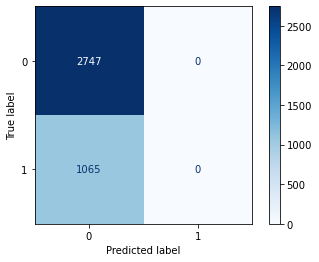

              precision    recall  f1-score   support

           0       0.72      1.00      0.84      2747
           1       0.00      0.00      0.00      1065

    accuracy                           0.72      3812
   macro avg       0.36      0.50      0.42      3812
weighted avg       0.52      0.72      0.60      3812



c:\Users\mcacs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mcacs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mcacs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [85]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix(y_test, preds)
matrix = plot_confusion_matrix(final_cl_p13m, X_test, y_test, cmap=plt.cm.Blues)
plt.show()
print(classification_report(y_test, preds))

#### Curva ROC:

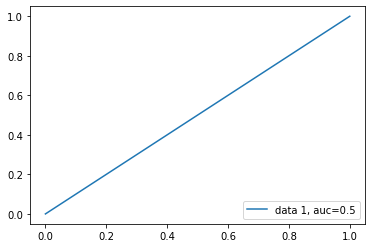

In [86]:
from sklearn import metrics
#y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  preds)
auc = metrics.roc_auc_score(y_test, preds)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### Período 2 (01/06/2020 até 31/08/2020):

In [87]:
Pre_processing_models_23m = Pre_processing_models(periodo_2)
Pre_processing_models_23m.run_graves()

df_p23m = Pre_processing_models_23m.df
df_p23m = df_p23m[list_features]
df_p23m

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino,data_notificacao
1,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000000,1,0,2020-06-02
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.803738,1,0,2020-06-02
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.635514,0,1,2020-06-02
5,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.869159,0,1,2020-06-02
6,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.626168,1,0,2020-06-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36251,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.644860,1,0,2020-06-09
36252,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.654206,1,0,2020-06-23
36261,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.747664,0,1,2020-08-26
36270,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.766355,1,0,2020-08-13


In [88]:
df2_p23m = pd.DataFrame()
df2_p23m = df_p23m
df2_p23m.set_index('data_notificacao', inplace=True)
df2_p23m.sort_index(inplace=True)
df2_p23m

c:\Users\mcacs\anaconda3\lib\site-packages\pandas\core\frame.py:6393: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().sort_index(


,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_KIDNEY,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino
data_notificacao,,,,,,,,,,,,,,,,,,,,,
2020-06-02,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000000,1,0
2020-06-02,1,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0.588785,0,1
2020-06-02,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.588785,1,0
2020-06-02,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.635514,0,1
2020-06-02,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.411215,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-30,1,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0.112150,1,0
2020-08-30,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.476636,0,1
2020-08-30,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.065421,0,1


#### Aplicação do modelo:

In [89]:
#utilizando diferentes random_states para mudar os conjuntos de treino e teste
list_random_states = [42]

#listas para armazenar os resutados
mean_test_scores_2 = []
std_test_scores_2 = []
best_scores_2 = []
best_params_2 = []

X = df2_p23m.drop(labels=['death'], axis=1)
y = df2_p23m['death']

for random_state in list_random_states:

    for train_index, test_index in tss.split(X):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    mean_test_score, std_test_score, best_score, best_param = SVC_model(X_train,y_train)

    mean_test_scores_2.append(mean_test_score)
    std_test_scores_2.append(std_test_score)
    best_scores_2.append(best_score)
    best_params_2.append(best_param)


#armazenando as informações na lista para todos os periodos de 3 meses
mean_test_scores_periodos_3meses.append(mean_test_scores_2)
std_test_scores_periodos_3meses.append(std_test_scores_2)
best_scores_periodos_3meses.append(best_scores_2)
best_params_periodos_3meses.append(best_params_2)



########################################

best_score: 0.7484539394817824
best_params_: {'C': 100, 'gamma': 0.01, 'kernel': 'sigmoid'}
########################################



In [90]:
X_train.index

Index(['2020-06-02', '2020-06-02', '2020-06-02', '2020-06-02', '2020-06-02',
       '2020-06-02', '2020-06-02', '2020-06-02', '2020-06-02', '2020-06-02',
       ...
       '2020-07-23', '2020-07-23', '2020-07-23', '2020-07-23', '2020-07-23',
       '2020-07-23', '2020-07-24', '2020-07-24', '2020-07-24', '2020-07-24'],
      dtype='object', name='data_notificacao', length=3188)

In [91]:
X_test.index

Index(['2020-07-24', '2020-07-24', '2020-07-24', '2020-07-24', '2020-07-24',
       '2020-07-24', '2020-07-24', '2020-07-24', '2020-07-24', '2020-07-24',
       ...
       '2020-08-30', '2020-08-30', '2020-08-30', '2020-08-30', '2020-08-30',
       '2020-08-30', '2020-08-30', '2020-08-30', '2020-08-30', '2020-08-30'],
      dtype='object', name='data_notificacao', length=1593)

In [92]:
print(f'Best_score = {max(best_scores_periodos_3meses[1])}')
index = best_scores_periodos_3meses[1].index(max(best_scores_periodos_3meses[1]))
print(f'Best_params = {best_params_periodos_3meses[1][index]}')

Best_score = 0.7484539394817824
Best_params = {'C': 100, 'gamma': 0.01, 'kernel': 'sigmoid'}


## Testando o modelo para os melhores parâmetros:

In [93]:
# parametrizando o modelo final
final_cl_p23m = SVC(C=100, gamma=0.01, kernel='sigmoid')

#treinando o modelo final
final_cl_p23m.fit(X_train, y_train)


preds = final_cl_p23m.predict(X_test)

accuracy_score(y_test, preds)

0.807909604519774

In [94]:
from sklearn.metrics import f1_score
print(f1_score(y_test, preds))
print(f1_score(y_test, preds, average='macro'))
print(f1_score(y_test, preds, average='micro'))
print(f1_score(y_test, preds, average='weighted'))

0.05555555555555556
0.47431865828092246
0.8079096045197741
0.7432418560763087


In [95]:
from sklearn.metrics import precision_score
print(precision_score(y_test, preds))
print(precision_score(y_test, preds, average='macro'))
print(precision_score(y_test, preds, average='micro'))
print(precision_score(y_test, preds, average='weighted'))

0.23076923076923078
0.5265815265815266
0.807909604519774
0.7165476148526996


In [96]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, preds, multi_class='ovr')

0.5043215837759537

#### Matriz de Confusão e Classification Report:

c:\Users\mcacs\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


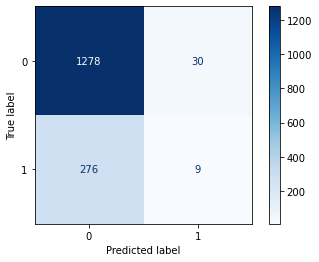

              precision    recall  f1-score   support

           0       0.82      0.98      0.89      1308
           1       0.23      0.03      0.06       285

    accuracy                           0.81      1593
   macro avg       0.53      0.50      0.47      1593
weighted avg       0.72      0.81      0.74      1593



In [97]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix(y_test, preds)
matrix = plot_confusion_matrix(final_cl_p23m, X_test, y_test, cmap=plt.cm.Blues)
plt.show()
print(classification_report(y_test, preds))

#### Curva ROC:

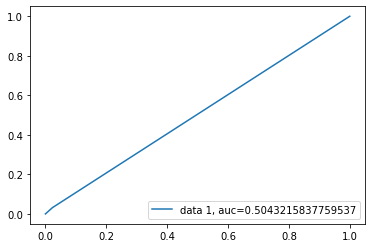

In [98]:
from sklearn import metrics
#y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  preds)
auc = metrics.roc_auc_score(y_test, preds)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### Período 3 (01/09/2020 até 30/11/2020):

In [99]:
Pre_processing_models_33m = Pre_processing_models(periodo_3)
Pre_processing_models_33m.run_graves()

df_p33m = Pre_processing_models_33m.df
df_p33m = df_p33m[list_features]
df_p33m

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino,data_notificacao
431,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0.807692,0,1,2020-09-16
432,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.182692,0,1,2020-09-27
433,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.875000,1,0,2020-09-30
434,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.548077,0,1,2020-09-30
436,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.807692,1,0,2020-11-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36168,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0.576923,1,0,2020-11-06
36169,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.586538,0,1,2020-11-25
36235,1,0,1,1,0,0,0,1,0,1,...,0,0,0,0,0,1,0.605769,0,1,2020-10-19
36236,1,0,1,1,0,0,0,0,1,1,...,0,0,0,0,0,1,0.519231,0,1,2020-10-14


In [100]:
df2_p33m = pd.DataFrame()
df2_p33m = df_p33m
df2_p33m.set_index('data_notificacao', inplace=True)
df2_p33m.sort_index(inplace=True)
df2_p33m

c:\Users\mcacs\anaconda3\lib\site-packages\pandas\core\frame.py:6393: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().sort_index(


,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_KIDNEY,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino
data_notificacao,,,,,,,,,,,,,,,,,,,,,
2020-09-02,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000000,1,0
2020-09-02,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.625000,0,1
2020-09-02,1,0,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0.384615,0,1
2020-09-02,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.836538,1,0
2020-09-02,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-29,1,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0.807692,0,1
2020-11-29,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.394231,0,1
2020-11-29,1,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0.528846,0,1


#### Aplicação do modelo:

In [101]:
#utilizando diferentes random_states para mudar os conjuntos de treino e teste
list_random_states = [42]

#listas para armazenar os resutados
mean_test_scores_3 = []
std_test_scores_3 = []
best_scores_3 = []
best_params_3 = []

X = df2_p33m.drop(labels=['death'], axis=1)
y = df2_p33m['death']

for random_state in list_random_states:

    for train_index, test_index in tss.split(X):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    mean_test_score, std_test_score, best_score, best_param = SVC_model(X_train,y_train)

    mean_test_scores_3.append(mean_test_score)
    std_test_scores_3.append(std_test_score)
    best_scores_3.append(best_score)
    best_params_3.append(best_param)


#armazenando as informações na lista para todos os periodos de 3 meses
mean_test_scores_periodos_3meses.append(mean_test_scores_3)
std_test_scores_periodos_3meses.append(std_test_scores_3)
best_scores_periodos_3meses.append(best_scores_3)
best_params_periodos_3meses.append(best_params_3)

########################################

best_score: 0.7265748461385745
best_params_: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
########################################



In [102]:
X_train.index

Index(['2020-09-02', '2020-09-02', '2020-09-02', '2020-09-02', '2020-09-02',
       '2020-09-02', '2020-09-02', '2020-09-02', '2020-09-02', '2020-09-02',
       ...
       '2020-11-02', '2020-11-02', '2020-11-02', '2020-11-02', '2020-11-02',
       '2020-11-02', '2020-11-02', '2020-11-02', '2020-11-02', '2020-11-03'],
      dtype='object', name='data_notificacao', length=1440)

In [103]:
X_test.index

Index(['2020-11-03', '2020-11-03', '2020-11-03', '2020-11-03', '2020-11-03',
       '2020-11-03', '2020-11-03', '2020-11-03', '2020-11-03', '2020-11-03',
       ...
       '2020-11-29', '2020-11-29', '2020-11-29', '2020-11-29', '2020-11-29',
       '2020-11-29', '2020-11-29', '2020-11-29', '2020-11-29', '2020-11-29'],
      dtype='object', name='data_notificacao', length=720)

In [104]:
print(f'Best_score = {max(best_scores_periodos_3meses[2])}')
index = best_scores_periodos_3meses[2].index(max(best_scores_periodos_3meses[2]))
print(f'Best_params = {best_params_periodos_3meses[2][index]}')

Best_score = 0.7265748461385745
Best_params = {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


## Testando o modelo para os melhores parâmetros:

In [105]:
# parametrizando o modelo final
final_cl_p33m = SVC(C=10, gamma=0.01, kernel='rbf')

#treinando o modelo final
final_cl_p33m.fit(X_train, y_train)


preds = final_cl_p33m.predict(X_test)

accuracy_score(y_test, preds)

0.6680555555555555

In [106]:
from sklearn.metrics import f1_score
print(f1_score(y_test, preds))
print(f1_score(y_test, preds, average='macro'))
print(f1_score(y_test, preds, average='micro'))
print(f1_score(y_test, preds, average='weighted'))

0.0
0.4004995836802664
0.6680555555555555
0.5351119437505781


In [107]:
from sklearn.metrics import precision_score
print(precision_score(y_test, preds))
print(precision_score(y_test, preds, average='macro'))
print(precision_score(y_test, preds, average='micro'))
print(precision_score(y_test, preds, average='weighted'))

0.0
0.33402777777777776
0.6680555555555555
0.44629822530864194


c:\Users\mcacs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mcacs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mcacs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [108]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, preds, multi_class='ovr')

0.5

#### Matriz de Confusão e Classification Report:

c:\Users\mcacs\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


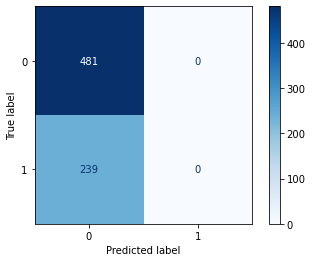

              precision    recall  f1-score   support

           0       0.67      1.00      0.80       481
           1       0.00      0.00      0.00       239

    accuracy                           0.67       720
   macro avg       0.33      0.50      0.40       720
weighted avg       0.45      0.67      0.54       720



c:\Users\mcacs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mcacs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mcacs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [109]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix(y_test, preds)
matrix = plot_confusion_matrix(final_cl_p33m, X_test, y_test, cmap=plt.cm.Blues)
plt.show()
print(classification_report(y_test, preds))

#### Curva ROC

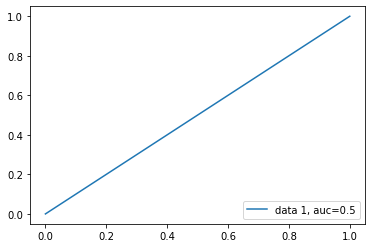

In [110]:
from sklearn import metrics
#y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  preds)
auc = metrics.roc_auc_score(y_test, preds)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### Período 4 (01/12/2020 até 28/02/2021):

In [111]:
Pre_processing_models_43m = Pre_processing_models(periodo_4)
Pre_processing_models_43m.run_graves()

df_p43m = Pre_processing_models_43m.df
df_p43m = df_p43m[list_features]
df_p43m

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino,data_notificacao
937,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.517544,1,0,2021-01-19
938,1,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0.350877,0,1,2021-01-11
939,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.771930,1,0,2021-01-06
970,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.026316,1,0,2021-02-15
979,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.456140,1,0,2021-01-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36245,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.666667,1,0,2021-01-18
36246,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.570175,1,0,2020-12-30
36247,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.429825,0,1,2021-02-02
36351,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0.798246,1,0,2021-01-13


In [112]:
df2_p43m = pd.DataFrame()
df2_p43m = df_p43m
df2_p43m.set_index('data_notificacao', inplace=True)
df2_p43m.sort_index(inplace=True)
df2_p43m

c:\Users\mcacs\anaconda3\lib\site-packages\pandas\core\frame.py:6393: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().sort_index(


,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_KIDNEY,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino
data_notificacao,,,,,,,,,,,,,,,,,,,,,
2020-12-02,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.482456,1,0
2020-12-02,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.763158,0,1
2020-12-02,1,0,1,1,0,0,0,0,0,1,...,0,0,1,1,0,0,0,0.280702,0,1
2020-12-02,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.482456,0,1
2020-12-02,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.271930,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-27,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.719298,1,0
2021-02-27,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.684211,1,0
2021-02-27,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.596491,1,0


#### Aplicação do modelo:

In [113]:
#utilizando diferentes random_states para mudar os conjuntos de treino e teste
list_random_states = [42]

#listas para armazenar os resutados
mean_test_scores_4 = []
std_test_scores_4 = []
best_scores_4 = []
best_params_4 = []

X = df2_p43m.drop(labels=['death'], axis=1)
y = df2_p43m['death']

for random_state in list_random_states:

    for train_index, test_index in tss.split(X):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    mean_test_score, std_test_score, best_score, best_param = SVC_model(X_train,y_train)

    mean_test_scores_4.append(mean_test_score)
    std_test_scores_4.append(std_test_score)
    best_scores_4.append(best_score)
    best_params_4.append(best_param)


#armazenando as informações na lista para todos os periodos de 3 meses
mean_test_scores_periodos_3meses.append(mean_test_scores_4)
std_test_scores_periodos_3meses.append(std_test_scores_4)
best_scores_periodos_3meses.append(best_scores_4)
best_params_periodos_3meses.append(best_params_4)

########################################

best_score: 0.7434646921017404
best_params_: {'C': 100, 'gamma': 1, 'kernel': 'linear'}
########################################



In [114]:
X_train.index

Index(['2020-12-02', '2020-12-02', '2020-12-02', '2020-12-02', '2020-12-02',
       '2020-12-02', '2020-12-02', '2020-12-02', '2020-12-02', '2020-12-02',
       ...
       '2021-01-31', '2021-01-31', '2021-01-31', '2021-01-31', '2021-01-31',
       '2021-01-31', '2021-01-31', '2021-01-31', '2021-01-31', '2021-01-31'],
      dtype='object', name='data_notificacao', length=1891)

In [115]:
X_test.index

Index(['2021-01-31', '2021-01-31', '2021-01-31', '2021-01-31', '2021-01-31',
       '2021-01-31', '2021-01-31', '2021-01-31', '2021-01-31', '2021-01-31',
       ...
       '2021-02-27', '2021-02-27', '2021-02-27', '2021-02-27', '2021-02-27',
       '2021-02-27', '2021-02-27', '2021-02-27', '2021-02-27', '2021-02-27'],
      dtype='object', name='data_notificacao', length=945)

In [116]:
print(f'Best_score = {max(best_scores_periodos_3meses[3])}')
index = best_scores_periodos_3meses[3].index(max(best_scores_periodos_3meses[3]))
print(f'Best_params = {best_params_periodos_3meses[3][index]}')

Best_score = 0.7434646921017404
Best_params = {'C': 100, 'gamma': 1, 'kernel': 'linear'}


## Testando o modelo para os melhores parâmetros:

In [117]:
# parametrizando o modelo final
final_cl_p43m = SVC(C=100, gamma=1, kernel='linear')

#treinando o modelo final
final_cl_p43m.fit(X_train, y_train)


preds = final_cl_p43m.predict(X_test)

accuracy_score(y_test, preds)

0.7248677248677249

In [118]:
from sklearn.metrics import f1_score
print(f1_score(y_test, preds))
print(f1_score(y_test, preds, average='macro'))
print(f1_score(y_test, preds, average='micro'))
print(f1_score(y_test, preds, average='weighted'))

0.5
0.6551094890510949
0.7248677248677248
0.7038581856100102


In [119]:
from sklearn.metrics import precision_score
print(precision_score(y_test, preds))
print(precision_score(y_test, preds, average='macro'))
print(precision_score(y_test, preds, average='micro'))
print(precision_score(y_test, preds, average='weighted'))

0.6632653061224489
0.7021266450505436
0.7248677248677249
0.714340208713659


In [120]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, preds, multi_class='ovr')

0.6474771873322598

#### Matriz de Confusão e Classification Report:

c:\Users\mcacs\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


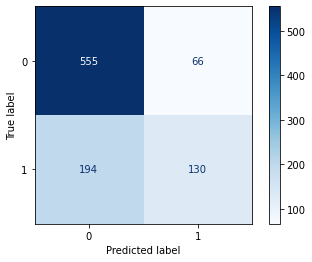

              precision    recall  f1-score   support

           0       0.74      0.89      0.81       621
           1       0.66      0.40      0.50       324

    accuracy                           0.72       945
   macro avg       0.70      0.65      0.66       945
weighted avg       0.71      0.72      0.70       945



In [121]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix(y_test, preds)
matrix = plot_confusion_matrix(final_cl_p43m, X_test, y_test, cmap=plt.cm.Blues)
plt.show()
print(classification_report(y_test, preds))

#### Curva ROC:

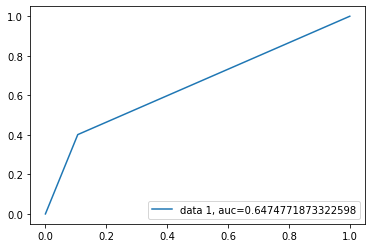

In [122]:
from sklearn import metrics
#y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  preds)
auc = metrics.roc_auc_score(y_test, preds)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### Período 5 (01/03/2021 até 31/05/2021):

In [123]:
Pre_processing_models_53m = Pre_processing_models(periodo_5)
Pre_processing_models_53m.run_graves()

df_p53m = Pre_processing_models_53m.df
df_p53m = df_p53m[list_features]
df_p53m

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino,data_notificacao
952,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.429825,0,1,2021-05-07
953,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.315789,1,0,2021-04-27
954,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.368421,1,0,2021-04-14
955,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0.394737,0,1,2021-04-10
956,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0.377193,0,1,2021-03-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36332,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.333333,1,0,2021-05-18
36333,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.631579,1,0,2021-03-12
36334,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0.438596,1,0,2021-05-25
36362,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.491228,1,0,2021-05-11


In [124]:
df2_p53m = pd.DataFrame()
df2_p53m = df_p53m
df2_p53m.set_index('data_notificacao', inplace=True)
df2_p53m.sort_index(inplace=True)
df2_p53m

c:\Users\mcacs\anaconda3\lib\site-packages\pandas\core\frame.py:6393: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().sort_index(


,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_KIDNEY,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino
data_notificacao,,,,,,,,,,,,,,,,,,,,,
2021-03-02,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0.333333,0,1
2021-03-02,0,0,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0.412281,0,1
2021-03-02,1,0,1,1,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0.482456,1,0
2021-03-02,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.491228,1,0
2021-03-02,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.008772,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-30,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.333333,0,1
2021-05-30,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.043860,0,1
2021-05-30,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.447368,0,1


#### Aplicação do modelo:

In [125]:
#utilizando diferentes random_states para mudar os conjuntos de treino e teste
list_random_states = [42]

#listas para armazenar os resutados
mean_test_scores_5 = []
std_test_scores_5 = []
best_scores_5 = []
best_params_5 = []

X = df2_p53m.drop(labels=['death'], axis=1)
y = df2_p53m['death']

for random_state in list_random_states:

    for train_index, test_index in tss.split(X):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    mean_test_score, std_test_score, best_score, best_param = SVC_model(X_train,y_train)

    mean_test_scores_5.append(mean_test_score)
    std_test_scores_5.append(std_test_score)
    best_scores_5.append(best_score)
    best_params_5.append(best_param)


#armazenando as informações na lista para todos os periodos de 3 meses
mean_test_scores_periodos_3meses.append(mean_test_scores_5)
std_test_scores_periodos_3meses.append(std_test_scores_5)
best_scores_periodos_3meses.append(best_scores_5)
best_params_periodos_3meses.append(best_params_5)


########################################

best_score: 0.7735869171999477
best_params_: {'C': 100, 'gamma': 1, 'kernel': 'linear'}
########################################



In [126]:
X_train.index

Index(['2021-03-02', '2021-03-02', '2021-03-02', '2021-03-02', '2021-03-02',
       '2021-03-02', '2021-03-02', '2021-03-02', '2021-03-02', '2021-03-02',
       ...
       '2021-04-29', '2021-04-30', '2021-04-30', '2021-04-30', '2021-04-30',
       '2021-04-30', '2021-04-30', '2021-04-30', '2021-04-30', '2021-04-30'],
      dtype='object', name='data_notificacao', length=3736)

In [127]:
X_test.index

Index(['2021-04-30', '2021-04-30', '2021-04-30', '2021-04-30', '2021-04-30',
       '2021-04-30', '2021-04-30', '2021-04-30', '2021-04-30', '2021-04-30',
       ...
       '2021-05-30', '2021-05-30', '2021-05-30', '2021-05-30', '2021-05-30',
       '2021-05-30', '2021-05-30', '2021-05-30', '2021-05-30', '2021-05-30'],
      dtype='object', name='data_notificacao', length=1867)

In [128]:
print(f'Best_score = {max(best_scores_periodos_3meses[4])}')
index = best_scores_periodos_3meses[4].index(max(best_scores_periodos_3meses[4]))
print(f'Best_params = {best_params_periodos_3meses[4][index]}')

Best_score = 0.7735869171999477
Best_params = {'C': 100, 'gamma': 1, 'kernel': 'linear'}


## Testando o modelo para os melhores parâmetros:

In [129]:
# parametrizando o modelo final
final_cl_p53m = SVC(C=100, gamma=1, kernel='linear')

#treinando o modelo final
final_cl_p53m.fit(X_train, y_train)


preds = final_cl_p53m.predict(X_test)

accuracy_score(y_test, preds)

0.7632565613283342

In [130]:
from sklearn.metrics import f1_score
print(f1_score(y_test, preds))
print(f1_score(y_test, preds, average='macro'))
print(f1_score(y_test, preds, average='micro'))
print(f1_score(y_test, preds, average='weighted'))

0.4848484848484849
0.6655814051502508
0.7632565613283342
0.7355706399537735


In [131]:
from sklearn.metrics import precision_score
print(precision_score(y_test, preds))
print(precision_score(y_test, preds, average='macro'))
print(precision_score(y_test, preds, average='micro'))
print(precision_score(y_test, preds, average='weighted'))

0.7272727272727273
0.7485193490886091
0.7632565613283342
0.7567471517521777


In [132]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, preds, multi_class='ovr')

0.6517023517023518

#### Matriz de Confusão e Classification Report:

c:\Users\mcacs\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


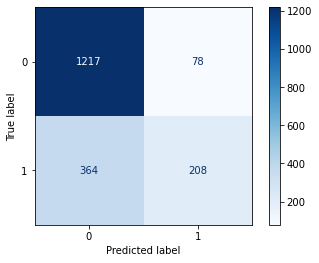

              precision    recall  f1-score   support

           0       0.77      0.94      0.85      1295
           1       0.73      0.36      0.48       572

    accuracy                           0.76      1867
   macro avg       0.75      0.65      0.67      1867
weighted avg       0.76      0.76      0.74      1867



In [133]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix(y_test, preds)
matrix = plot_confusion_matrix(final_cl_p53m, X_test, y_test, cmap=plt.cm.Blues)
plt.show()
print(classification_report(y_test, preds))

#### Curva ROC:

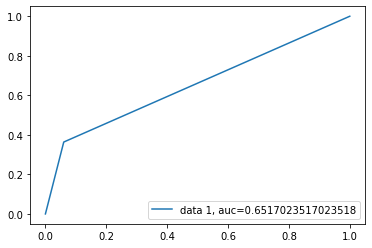

In [134]:
from sklearn import metrics
#y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  preds)
auc = metrics.roc_auc_score(y_test, preds)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### Período 6 (01/06/2021 até 31/08/2021):

In [135]:
Pre_processing_models_63m = Pre_processing_models(periodo_6)
Pre_processing_models_63m.run_graves()

df_p63m = Pre_processing_models_63m.df
df_p63m = df_p63m[list_features]
df_p63m

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino,data_notificacao
1661,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0.456140,1,0,2021-07-05
1663,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.438596,0,1,2021-06-06
1664,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0.684211,0,1,2021-06-16
1665,1,0,1,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0.675439,0,1,2021-07-09
1667,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.605263,1,0,2021-07-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36359,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.570175,0,1,2021-06-26
36364,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.622807,1,0,2021-06-09
36371,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.403509,0,1,2021-07-01
36372,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.622807,0,1,2021-06-18


In [136]:
df2_p63m = pd.DataFrame()
df2_p63m = df_p63m
df2_p63m.set_index('data_notificacao', inplace=True)
df2_p63m.sort_index(inplace=True)
df2_p63m

c:\Users\mcacs\anaconda3\lib\site-packages\pandas\core\frame.py:6393: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().sort_index(


,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_KIDNEY,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino
data_notificacao,,,,,,,,,,,,,,,,,,,,,
2021-06-02,1,0,0,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0.385965,0,1
2021-06-02,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.754386,1,0
2021-06-02,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.464912,0,1
2021-06-02,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.342105,0,1
2021-06-02,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.526316,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-30,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.543860,0,1
2021-08-30,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.815789,1,0
2021-08-30,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.508772,1,0


#### Aplicação do modelo:

In [137]:
#utilizando diferentes random_states para mudar os conjuntos de treino e teste
list_random_states = [42]

#listas para armazenar os resutados
mean_test_scores_6 = []
std_test_scores_6 = []
best_scores_6 = []
best_params_6 = []

X = df2_p63m.drop(labels=['death'], axis=1)
y = df2_p63m['death']

for random_state in list_random_states:

    for train_index, test_index in tss.split(X):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    mean_test_score, std_test_score, best_score, best_param = SVC_model(X_train,y_train)

    mean_test_scores_6.append(mean_test_score)
    std_test_scores_6.append(std_test_score)
    best_scores_6.append(best_score)
    best_params_6.append(best_param)


#armazenando as informações na lista para todos os periodos de 3 meses
mean_test_scores_periodos_3meses.append(mean_test_scores_6)
std_test_scores_periodos_3meses.append(std_test_scores_6)
best_scores_periodos_3meses.append(best_scores_6)
best_params_periodos_3meses.append(best_params_6)

########################################

best_score: 0.7174290051016895
best_params_: {'C': 100, 'gamma': 1, 'kernel': 'linear'}
########################################



In [138]:
X_train.index

Index(['2021-06-02', '2021-06-02', '2021-06-02', '2021-06-02', '2021-06-02',
       '2021-06-02', '2021-06-02', '2021-06-02', '2021-06-02', '2021-06-02',
       ...
       '2021-07-14', '2021-07-14', '2021-07-14', '2021-07-14', '2021-07-14',
       '2021-07-14', '2021-07-14', '2021-07-14', '2021-07-15', '2021-07-15'],
      dtype='object', name='data_notificacao', length=1968)

In [139]:
X_test.index

Index(['2021-07-15', '2021-07-15', '2021-07-15', '2021-07-15', '2021-07-15',
       '2021-07-15', '2021-07-15', '2021-07-15', '2021-07-15', '2021-07-15',
       ...
       '2021-08-30', '2021-08-30', '2021-08-30', '2021-08-30', '2021-08-30',
       '2021-08-30', '2021-08-30', '2021-08-30', '2021-08-30', '2021-08-30'],
      dtype='object', name='data_notificacao', length=983)

In [140]:
print(f'Best_score = {max(best_scores_periodos_3meses[5])}')
index = best_scores_periodos_3meses[5].index(max(best_scores_periodos_3meses[5]))
print(f'Best_params = {best_params_periodos_3meses[5][index]}')

Best_score = 0.7174290051016895
Best_params = {'C': 100, 'gamma': 1, 'kernel': 'linear'}


## Testando o modelo para os melhores parâmetros:

In [143]:
# parametrizando o modelo final
final_cl_p63m = SVC(C=100, gamma=1, kernel='linear')

#treinando o modelo final
final_cl_p63m.fit(X_train, y_train)


preds = final_cl_p63m.predict(X_test)

accuracy_score(y_test, preds)

0.7589013224821973

In [144]:
from sklearn.metrics import f1_score
print(f1_score(y_test, preds))
print(f1_score(y_test, preds, average='macro'))
print(f1_score(y_test, preds, average='micro'))
print(f1_score(y_test, preds, average='weighted'))

0.5212121212121212
0.680048616690357
0.7589013224821974
0.7335327265614617


In [145]:
from sklearn.metrics import precision_score
print(precision_score(y_test, preds))
print(precision_score(y_test, preds, average='macro'))
print(precision_score(y_test, preds, average='micro'))
print(precision_score(y_test, preds, average='weighted'))

0.7633136094674556
0.7606494337263567
0.7589013224821973
0.7597523409793541


In [146]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, preds, multi_class='ovr')

0.6674113604317824

#### Matriz de Confusão e Classification Report:

c:\Users\mcacs\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


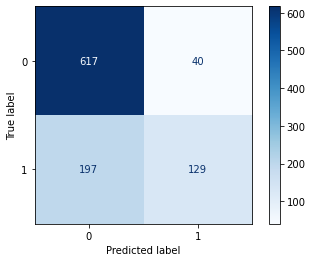

              precision    recall  f1-score   support

           0       0.76      0.94      0.84       657
           1       0.76      0.40      0.52       326

    accuracy                           0.76       983
   macro avg       0.76      0.67      0.68       983
weighted avg       0.76      0.76      0.73       983



In [147]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix(y_test, preds)
matrix = plot_confusion_matrix(final_cl_p63m, X_test, y_test, cmap=plt.cm.Blues)
plt.show()
print(classification_report(y_test, preds))

#### Curva ROC:

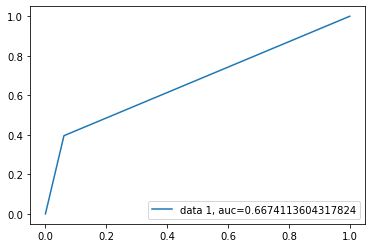

In [148]:
from sklearn import metrics
#y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  preds)
auc = metrics.roc_auc_score(y_test, preds)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### Período 7 (01/09/2021 até 30/11/2021):

In [149]:
Pre_processing_models_73m = Pre_processing_models(periodo_7)
Pre_processing_models_73m.run_graves()

df_p73m = Pre_processing_models_73m.df
df_p73m = df_p73m[list_features]
df_p73m

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino,data_notificacao
1804,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.258929,0,1,2021-09-18
1805,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.250000,1,0,2021-09-25
1807,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.741071,0,1,2021-09-08
1808,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.589286,1,0,2021-10-07
1809,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0.544643,0,1,2021-10-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36322,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.544643,1,0,2021-11-19
36323,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.500000,1,0,2021-11-24
36335,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.669643,0,1,2021-10-24
36340,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.687500,0,1,2021-11-01


In [150]:
df2_p73m = pd.DataFrame()
df2_p73m = df_p73m
df2_p73m.set_index('data_notificacao', inplace=True)
df2_p73m.sort_index(inplace=True)
df2_p73m

c:\Users\mcacs\anaconda3\lib\site-packages\pandas\core\frame.py:6393: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().sort_index(


,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_KIDNEY,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino
data_notificacao,,,,,,,,,,,,,,,,,,,,,
2021-09-02,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0.517857,1,0
2021-09-02,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0.508929,0,1
2021-09-02,1,0,0,1,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0.392857,0,1
2021-09-02,1,0,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0.758929,0,1
2021-09-02,1,0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0.383929,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-29,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.785714,1,0
2021-11-29,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.312500,0,1
2021-11-29,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.500000,0,1


#### Aplicação do modelo:

In [151]:
#utilizando diferentes random_states para mudar os conjuntos de treino e teste
list_random_states = [42]

#listas para armazenar os resutados
mean_test_scores_7 = []
std_test_scores_7 = []
best_scores_7 = []
best_params_7 = []

X = df2_p73m.drop(labels=['death'], axis=1)
y = df2_p73m['death']

for random_state in list_random_states:

    for train_index, test_index in tss.split(X):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    mean_test_score, std_test_score, best_score, best_param = SVC_model(X_train,y_train)

    mean_test_scores_7.append(mean_test_score)
    std_test_scores_7.append(std_test_score)
    best_scores_7.append(best_score)
    best_params_7.append(best_param)


#armazenando as informações na lista para todos os periodos de 3 meses
mean_test_scores_periodos_3meses.append(mean_test_scores_7)
std_test_scores_periodos_3meses.append(std_test_scores_7)
best_scores_periodos_3meses.append(best_scores_7)
best_params_periodos_3meses.append(best_params_7)

########################################

best_score: 0.6815551698455639
best_params_: {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
########################################



In [152]:
X_train.index

Index(['2021-09-02', '2021-09-02', '2021-09-02', '2021-09-02', '2021-09-02',
       '2021-09-02', '2021-09-02', '2021-09-02', '2021-09-02', '2021-09-02',
       ...
       '2021-10-26', '2021-10-26', '2021-10-26', '2021-10-26', '2021-10-27',
       '2021-10-27', '2021-10-27', '2021-10-27', '2021-10-27', '2021-10-27'],
      dtype='object', name='data_notificacao', length=1085)

In [153]:
X_test.index

Index(['2021-10-27', '2021-10-27', '2021-10-27', '2021-10-27', '2021-10-27',
       '2021-10-27', '2021-10-27', '2021-10-27', '2021-10-27', '2021-10-27',
       ...
       '2021-11-29', '2021-11-29', '2021-11-29', '2021-11-29', '2021-11-29',
       '2021-11-29', '2021-11-29', '2021-11-29', '2021-11-29', '2021-11-29'],
      dtype='object', name='data_notificacao', length=542)

In [154]:
print(f'Best_score = {max(best_scores_periodos_3meses[6])}')
index = best_scores_periodos_3meses[6].index(max(best_scores_periodos_3meses[6]))
print(f'Best_params = {best_params_periodos_3meses[6][index]}')

Best_score = 0.6815551698455639
Best_params = {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}


## Testando o modelo para os melhores parâmetros:

In [155]:
# parametrizando o modelo final
final_cl_p73m = SVC(C=0.1, gamma=1, kernel='linear')

#treinando o modelo final
final_cl_p73m.fit(X_train, y_train)


preds = final_cl_p73m.predict(X_test)

accuracy_score(y_test, preds)

0.8044280442804428

In [156]:
from sklearn.metrics import f1_score
print(f1_score(y_test, preds))
print(f1_score(y_test, preds, average='macro'))
print(f1_score(y_test, preds, average='micro'))
print(f1_score(y_test, preds, average='weighted'))

0.018518518518518517
0.45495598057073466
0.8044280442804429
0.7190731162776108


In [157]:
from sklearn.metrics import precision_score
print(precision_score(y_test, preds))
print(precision_score(y_test, preds, average='macro'))
print(precision_score(y_test, preds, average='micro'))
print(precision_score(y_test, preds, average='weighted'))

1.0
0.9020332717190388
0.8044280442804428
0.8427471335711508


In [158]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, preds, multi_class='ovr')

0.5046728971962616

#### Matriz de Confusão e Classification Report:

c:\Users\mcacs\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


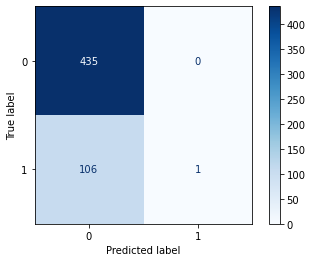

              precision    recall  f1-score   support

           0       0.80      1.00      0.89       435
           1       1.00      0.01      0.02       107

    accuracy                           0.80       542
   macro avg       0.90      0.50      0.45       542
weighted avg       0.84      0.80      0.72       542



In [159]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix(y_test, preds)
matrix = plot_confusion_matrix(final_cl_p73m, X_test, y_test, cmap=plt.cm.Blues)
plt.show()
print(classification_report(y_test, preds))

#### Curva ROC:

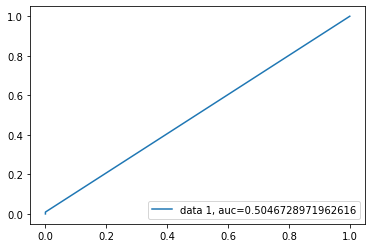

In [160]:
from sklearn import metrics
#y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  preds)
auc = metrics.roc_auc_score(y_test, preds)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### Período 8 (01/12/2021 até 28/02/2022):

In [161]:
Pre_processing_models_83m = Pre_processing_models(periodo_8)
Pre_processing_models_83m.run_graves()

df_p83m = Pre_processing_models_83m.df
df_p83m = df_p83m[list_features]
df_p83m

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino,data_notificacao
1825,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.495652,0,1,2021-12-03
1826,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.713043,1,0,2021-12-02
1827,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.721739,0,1,2021-12-13
1828,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.643478,1,0,2021-12-17
1829,1,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0.365217,0,1,2021-12-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36350,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.643478,1,0,2022-01-12
36360,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.234783,0,1,2022-02-26
36361,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.582609,0,1,2021-12-30
36368,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.756522,0,1,2022-02-02


In [162]:
df2_p83m = pd.DataFrame()
df2_p83m = df_p83m
df2_p83m.set_index('data_notificacao', inplace=True)
df2_p83m.sort_index(inplace=True)
df2_p83m

c:\Users\mcacs\anaconda3\lib\site-packages\pandas\core\frame.py:6393: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().sort_index(


,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_KIDNEY,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino
data_notificacao,,,,,,,,,,,,,,,,,,,,,
2021-12-02,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000000,1,0
2021-12-02,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.008696,1,0
2021-12-02,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.591304,0,1
2021-12-02,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.347826,0,1
2021-12-02,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.408696,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-27,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.217391,1,0
2022-02-27,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.513043,0,1
2022-02-27,1,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0.391304,0,1


#### Aplicação do modelo:

In [163]:
#utilizando diferentes random_states para mudar os conjuntos de treino e teste
list_random_states = [42]

#listas para armazenar os resutados
mean_test_scores_8 = []
std_test_scores_8 = []
best_scores_8 = []
best_params_8 = []

X = df2_p83m.drop(labels=['death'], axis=1)
y = df2_p83m['death']

for random_state in list_random_states:

    for train_index, test_index in tss.split(X):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    mean_test_score, std_test_score, best_score, best_param = SVC_model(X_train,y_train)

    mean_test_scores_8.append(mean_test_score)
    std_test_scores_8.append(std_test_score)
    best_scores_8.append(best_score)
    best_params_8.append(best_param)


#armazenando as informações na lista para todos os periodos de 3 meses
mean_test_scores_periodos_3meses.append(mean_test_scores_8)
std_test_scores_periodos_3meses.append(std_test_scores_8)
best_scores_periodos_3meses.append(best_scores_8)
best_params_periodos_3meses.append(best_params_8)

########################################

best_score: 0.5932263874263107
best_params_: {'C': 100, 'gamma': 0.01, 'kernel': 'sigmoid'}
########################################



In [165]:
X_train.index

Index(['2021-12-02', '2021-12-02', '2021-12-02', '2021-12-02', '2021-12-02',
       '2021-12-02', '2021-12-02', '2021-12-02', '2021-12-02', '2021-12-02',
       ...
       '2022-01-26', '2022-01-26', '2022-01-26', '2022-01-26', '2022-01-26',
       '2022-01-26', '2022-01-26', '2022-01-26', '2022-01-26', '2022-01-26'],
      dtype='object', name='data_notificacao', length=1818)

In [166]:
X_test.index

Index(['2022-01-26', '2022-01-26', '2022-01-26', '2022-01-26', '2022-01-26',
       '2022-01-26', '2022-01-26', '2022-01-26', '2022-01-26', '2022-01-26',
       ...
       '2022-02-27', '2022-02-27', '2022-02-27', '2022-02-27', '2022-02-27',
       '2022-02-27', '2022-02-27', '2022-02-27', '2022-02-27', '2022-02-27'],
      dtype='object', name='data_notificacao', length=909)

In [167]:
print(f'Best_score = {max(best_scores_periodos_3meses[7])}')
index = best_scores_periodos_3meses[7].index(max(best_scores_periodos_3meses[7]))
print(f'Best_params = {best_params_periodos_3meses[7][index]}')

Best_score = 0.5932263874263107
Best_params = {'C': 100, 'gamma': 0.01, 'kernel': 'sigmoid'}


## Testando o modelo para os melhores parâmetros:

In [168]:
# parametrizando o modelo final
final_cl_p83m = SVC(C=100, gamma=0.01, kernel='sigmoid')

#treinando o modelo final
final_cl_p83m.fit(X_train, y_train)


preds = final_cl_p83m.predict(X_test)

accuracy_score(y_test, preds)

0.7194719471947195

In [169]:
from sklearn.metrics import f1_score
print(f1_score(y_test, preds))
print(f1_score(y_test, preds, average='macro'))
print(f1_score(y_test, preds, average='micro'))
print(f1_score(y_test, preds, average='weighted'))

0.030418250950570346
0.4332155563434524
0.7194719471947195
0.610020974222176


In [170]:
from sklearn.metrics import precision_score
print(precision_score(y_test, preds))
print(precision_score(y_test, preds, average='macro'))
print(precision_score(y_test, preds, average='micro'))
print(precision_score(y_test, preds, average='weighted'))

0.5
0.6107103218645948
0.7194719471947195
0.6593059416929484


In [171]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, preds, multi_class='ovr')

0.5047850332793667

#### Matriz de Confusão e Classification Report:

c:\Users\mcacs\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


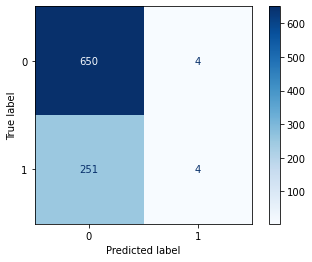

              precision    recall  f1-score   support

           0       0.72      0.99      0.84       654
           1       0.50      0.02      0.03       255

    accuracy                           0.72       909
   macro avg       0.61      0.50      0.43       909
weighted avg       0.66      0.72      0.61       909



In [172]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix(y_test, preds)
matrix = plot_confusion_matrix(final_cl_p83m, X_test, y_test, cmap=plt.cm.Blues)
plt.show()
print(classification_report(y_test, preds))

#### Curva ROC:

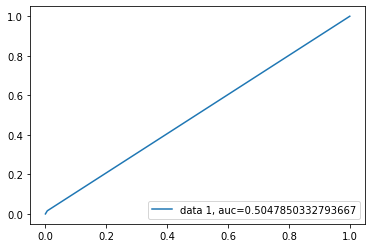

In [173]:
from sklearn import metrics
#y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  preds)
auc = metrics.roc_auc_score(y_test, preds)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### Período 9 (01/03/2022 até 31/05/2022):

In [174]:
Pre_processing_models_93m = Pre_processing_models(periodo_9)
Pre_processing_models_93m.run_graves()

df_p93m = Pre_processing_models_93m.df
df_p93m = df_p93m[list_features]
df_p93m

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino,data_notificacao
2165,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0.281818,0,1,2022-03-02
2169,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.600000,1,0,2022-03-07
2172,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0.554545,0,1,2022-03-12
2182,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.554545,0,1,2022-03-14
2185,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000000,0,1,2022-03-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36430,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.700000,0,1,2022-06-08
36431,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.672727,0,1,2022-06-09
36432,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.672727,0,1,2022-06-10
36433,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.663636,1,0,2022-06-12


In [175]:
df2_p93m = pd.DataFrame()
df2_p93m = df_p93m
df2_p93m.set_index('data_notificacao', inplace=True)
df2_p93m.sort_index(inplace=True)
df2_p93m

c:\Users\mcacs\anaconda3\lib\site-packages\pandas\core\frame.py:6393: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().sort_index(


,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_KIDNEY,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino
data_notificacao,,,,,,,,,,,,,,,,,,,,,
2022-03-02,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0.281818,0,1
2022-03-02,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0.672727,1,0
2022-03-02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.809091,1,0
2022-03-02,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.618182,1,0
2022-03-02,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.454545,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-12,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.654545,0,1
2022-06-12,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.663636,1,0
2022-06-12,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.600000,1,0


#### Aplicação do modelo:

In [176]:
#utilizando diferentes random_states para mudar os conjuntos de treino e teste
list_random_states = [42]

#listas para armazenar os resutados
mean_test_scores_9 = []
std_test_scores_9 = []
best_scores_9 = []
best_params_9 = []

X = df2_p93m.drop(labels=['death'], axis=1)
y = df2_p93m['death']

for random_state in list_random_states:

    for train_index, test_index in tss.split(X):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    mean_test_score, std_test_score, best_score, best_param = SVC_model(X_train,y_train)

    mean_test_scores_9.append(mean_test_score)
    std_test_scores_9.append(std_test_score)
    best_scores_9.append(best_score)
    best_params_9.append(best_param)


#armazenando as informações na lista para todos os periodos de 3 meses
mean_test_scores_periodos_3meses.append(mean_test_scores_9)
std_test_scores_periodos_3meses.append(std_test_scores_9)
best_scores_periodos_3meses.append(best_scores_9)
best_params_periodos_3meses.append(best_params_9)

########################################

best_score: 0.7640540606879304
best_params_: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
########################################



In [177]:
X_train.index

Index(['2022-03-02', '2022-03-02', '2022-03-02', '2022-03-02', '2022-03-02',
       '2022-03-02', '2022-03-02', '2022-03-02', '2022-03-02', '2022-03-02',
       ...
       '2022-05-05', '2022-05-05', '2022-05-05', '2022-05-06', '2022-05-06',
       '2022-05-06', '2022-05-06', '2022-05-06', '2022-05-06', '2022-05-06'],
      dtype='object', name='data_notificacao', length=1110)

In [178]:
X_test.index

Index(['2022-05-06', '2022-05-07', '2022-05-07', '2022-05-07', '2022-05-07',
       '2022-05-07', '2022-05-08', '2022-05-08', '2022-05-08', '2022-05-08',
       ...
       '2022-06-12', '2022-06-12', '2022-06-12', '2022-06-12', '2022-06-12',
       '2022-06-12', '2022-06-12', '2022-06-12', '2022-06-13', '2022-06-13'],
      dtype='object', name='data_notificacao', length=555)

In [179]:
print(f'Best_score = {max(best_scores_periodos_3meses[8])}')
index = best_scores_periodos_3meses[8].index(max(best_scores_periodos_3meses[8]))
print(f'Best_params = {best_params_periodos_3meses[8][index]}')

Best_score = 0.7640540606879304
Best_params = {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


## Testando o modelo para os melhores parâmetros:

In [180]:
# parametrizando o modelo final
final_cl_p93m = SVC(C=100, gamma=0.01, kernel='rbf')

#treinando o modelo final
final_cl_p93m.fit(X_train, y_train)


preds = final_cl_p93m.predict(X_test)

accuracy_score(y_test, preds)

0.8252252252252252

In [181]:
from sklearn.metrics import f1_score
print(f1_score(y_test, preds))
print(f1_score(y_test, preds, average='macro'))
print(f1_score(y_test, preds, average='micro'))
print(f1_score(y_test, preds, average='weighted'))

0.3660130718954249
0.6323273300960928
0.8252252252252252
0.8496973462490702


In [182]:
from sklearn.metrics import precision_score
print(precision_score(y_test, preds))
print(precision_score(y_test, preds, average='macro'))
print(precision_score(y_test, preds, average='micro'))
print(precision_score(y_test, preds, average='weighted'))

0.27450980392156865
0.6118685884950006
0.8252252252252252
0.8872262991468289


In [183]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, preds, multi_class='ovr')

0.7010971055088703

#### Matriz de Confusão e Classification Report:

c:\Users\mcacs\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


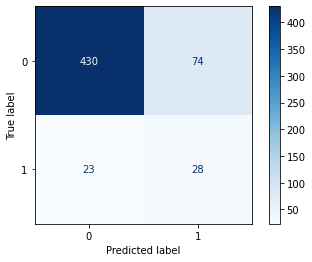

              precision    recall  f1-score   support

           0       0.95      0.85      0.90       504
           1       0.27      0.55      0.37        51

    accuracy                           0.83       555
   macro avg       0.61      0.70      0.63       555
weighted avg       0.89      0.83      0.85       555



In [184]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix(y_test, preds)
matrix = plot_confusion_matrix(final_cl_p93m, X_test, y_test, cmap=plt.cm.Blues)
plt.show()
print(classification_report(y_test, preds))

#### Curva ROC:

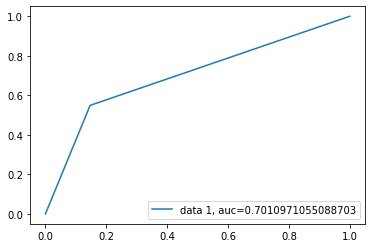

In [185]:
from sklearn import metrics
#y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  preds)
auc = metrics.roc_auc_score(y_test, preds)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### Período 10 (01/06/2022 até 13/06/2022):

In [186]:
Pre_processing_models_103m = Pre_processing_models(periodo_10)
Pre_processing_models_103m.run_graves()

df_p103m = Pre_processing_models_103m.df
df_p103m = df_p103m[list_features]
df_p103m

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino,data_notificacao
3889,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000000,0,1,2022-06-02
3893,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1.000000,1,0,2022-06-06
3894,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000000,1,0,2022-06-08
3895,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000000,1,0,2022-06-11
3975,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.833333,1,0,2022-06-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36430,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.754902,0,1,2022-06-08
36431,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.725490,0,1,2022-06-09
36432,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.725490,0,1,2022-06-10
36433,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.715686,1,0,2022-06-12


In [187]:
df2_p103m = pd.DataFrame()
df2_p103m = df_p103m
df2_p103m.set_index('data_notificacao', inplace=True)
df2_p103m.sort_index(inplace=True)
df2_p103m

c:\Users\mcacs\anaconda3\lib\site-packages\pandas\core\frame.py:6393: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().sort_index(


,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,DISEASE_KIDNEY,DISEASE_IMMUNOSUPPRESSION,DISEASE_TABAGIST,DISEASE_ETILISM,DISEASE_LIVER,DISEASE_NEUROLOGIC,death,idade,sexo_Feminino,sexo_Masculino
data_notificacao,,,,,,,,,,,,,,,,,,,,,
2022-06-02,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000000,0,1
2022-06-02,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000000,0,1
2022-06-02,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.009804,1,0
2022-06-02,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000000,1,0
2022-06-02,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.254902,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-12,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.627451,0,1
2022-06-12,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000000,1,0
2022-06-12,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.235294,0,1


#### Aplicação do modelo:

In [188]:
#utilizando diferentes random_states para mudar os conjuntos de treino e teste
list_random_states = [42]

#listas para armazenar os resutados
mean_test_scores_10 = []
std_test_scores_10 = []
best_scores_10 = []
best_params_10 = []

X = df2_p103m.drop(labels=['death'], axis=1)
y = df2_p103m['death']

for random_state in list_random_states:

    for train_index, test_index in tss.split(X):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    mean_test_score, std_test_score, best_score, best_param = SVC_model(X_train,y_train)

    mean_test_scores_10.append(mean_test_score)
    std_test_scores_10.append(std_test_score)
    best_scores_10.append(best_score)
    best_params_10.append(best_param)


#armazenando as informações na lista para todos os periodos de 3 meses
mean_test_scores_periodos_3meses.append(mean_test_scores_10)
std_test_scores_periodos_3meses.append(std_test_scores_10)
best_scores_periodos_3meses.append(best_scores_10)
best_params_periodos_3meses.append(best_params_10)

########################################

best_score: 0.8209523809523809
best_params_: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
########################################



In [189]:
X_train.index

Index(['2022-06-02', '2022-06-02', '2022-06-02', '2022-06-02', '2022-06-02',
       '2022-06-02', '2022-06-02', '2022-06-02', '2022-06-02', '2022-06-02',
       ...
       '2022-06-08', '2022-06-08', '2022-06-08', '2022-06-08', '2022-06-08',
       '2022-06-08', '2022-06-08', '2022-06-08', '2022-06-08', '2022-06-08'],
      dtype='object', name='data_notificacao', length=115)

In [190]:
X_test.index

Index(['2022-06-09', '2022-06-09', '2022-06-09', '2022-06-09', '2022-06-09',
       '2022-06-09', '2022-06-09', '2022-06-09', '2022-06-09', '2022-06-09',
       '2022-06-09', '2022-06-09', '2022-06-09', '2022-06-09', '2022-06-09',
       '2022-06-09', '2022-06-09', '2022-06-09', '2022-06-09', '2022-06-09',
       '2022-06-09', '2022-06-10', '2022-06-10', '2022-06-10', '2022-06-10',
       '2022-06-10', '2022-06-10', '2022-06-10', '2022-06-10', '2022-06-10',
       '2022-06-10', '2022-06-10', '2022-06-10', '2022-06-10', '2022-06-10',
       '2022-06-10', '2022-06-10', '2022-06-10', '2022-06-10', '2022-06-10',
       '2022-06-10', '2022-06-10', '2022-06-11', '2022-06-11', '2022-06-11',
       '2022-06-11', '2022-06-11', '2022-06-11', '2022-06-11', '2022-06-12',
       '2022-06-12', '2022-06-12', '2022-06-12', '2022-06-12', '2022-06-12',
       '2022-06-12', '2022-06-12'],
      dtype='object', name='data_notificacao')

In [191]:
print(f'Best_score = {max(best_scores_periodos_3meses[9])}')
index = best_scores_periodos_3meses[9].index(max(best_scores_periodos_3meses[9]))
print(f'Best_params = {best_params_periodos_3meses[9][index]}')

Best_score = 0.8209523809523809
Best_params = {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}


## Testando o modelo para os melhores parâmetros:

In [192]:
# parametrizando o modelo final
final_cl_p103m = SVC(C=100, gamma=0.1, kernel='rbf')

#treinando o modelo final
final_cl_p103m.fit(X_train, y_train)


preds = final_cl_p103m.predict(X_test)

accuracy_score(y_test, preds)

0.8596491228070176

In [193]:
from sklearn.metrics import f1_score
print(f1_score(y_test, preds))
print(f1_score(y_test, preds, average='macro'))
print(f1_score(y_test, preds, average='micro'))
print(f1_score(y_test, preds, average='weighted'))

0.0
0.4622641509433962
0.8596491228070176
0.9083085071168486


In [194]:
from sklearn.metrics import precision_score
print(precision_score(y_test, preds))
print(precision_score(y_test, preds, average='macro'))
print(precision_score(y_test, preds, average='micro'))
print(precision_score(y_test, preds, average='weighted'))

0.0
0.49
0.8596491228070176
0.9628070175438596


In [195]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, preds, multi_class='ovr')

0.4375

#### Matriz de Confusão e Classification Report:

c:\Users\mcacs\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


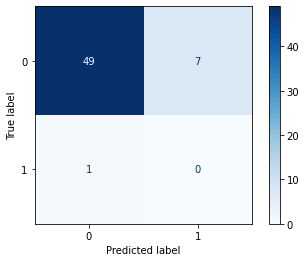

              precision    recall  f1-score   support

           0       0.98      0.88      0.92        56
           1       0.00      0.00      0.00         1

    accuracy                           0.86        57
   macro avg       0.49      0.44      0.46        57
weighted avg       0.96      0.86      0.91        57



In [196]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix(y_test, preds)
matrix = plot_confusion_matrix(final_cl_p103m, X_test, y_test, cmap=plt.cm.Blues)
plt.show()
print(classification_report(y_test, preds))

#### Curva ROC:

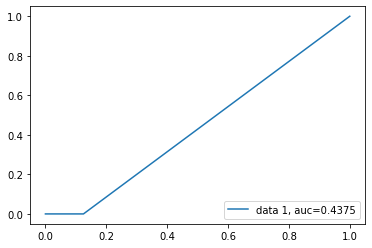

In [197]:
from sklearn import metrics
#y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  preds)
auc = metrics.roc_auc_score(y_test, preds)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()